In [13]:
library(shiny)
library(ggplot2)
library(tidyverse)
library(bslib)
library(thematic)

# Set the default theme for ggplot2 plots
# ggplot2::theme_set(ggplot2::theme_minimal())

# Apply the CSS used by the Shiny app to the ggplot2 plots
# thematic_shiny()

# Reactive function to call Python
predict_with_python <- function(x1, x2) {
  python_path <- "/home/natasamortvanski@vhio.org/miniconda3/envs/env_work_1/bin/python"
  py_script <- "/home/natasamortvanski@vhio.org/CARE/app/predict_model.py"

  # Capture both stdout and stderr
  result <- system2(
    python_path,
    args = c(py_script, x1, x2),
    stdout = TRUE,
    stderr = TRUE
  )

  # Print result to debug
  print(result)

  # Check if result is valid
  if(length(result) == 0 || !grepl(",", result[1])) {
    return(list(score = NA, group = NA))
  }

  res <- strsplit(result[1], ",")[[1]]
  list(score = as.numeric(res[1]), group = res[2])
}


ui <- page_sidebar(
     # Set the CSS theme
  theme = bs_theme(bootswatch = "darkly",
                   version = 5,
                   success = "#86C7ED",
                   "table-color" = "#86C7ED",
                   base_font = font_google("Lato"),
                   heading_font = font_face(family = "Open Sauce Sans",
                                            src = "url('../OpenSauceSans-Regular.ttf') format('truetype')")),

  # title = "Clinical Assessment of Risk in Endometrial Cancer (CARE)",
  title = tags$h1("Clinical Assessment of Risk in Endometrial Cancer (CARE)", style = "font-size: 40px; font-weight: bold; color: #86C7ED;"),


  sidebar = sidebar(
    width = 400,  # increase from default
    # p("Please enter your patient values below:"),
    div('CARE is a clinical prognostic modeling project for Endometrial Cancer, focused on patients defined as a Non-Specific Molecular Profile (NMSP).', style = "font-size: 28px; color: white;"),
    br(),
    div("Please enter your patient values below:", style = "font-size: 16px; color: white;"),
    br(),
    # numericInput("input_x1", "Input variable x1", value = 50),
    # numericInput("input_x2", "Input variable x2", value = 0)

    numericInput("input_x1", label = tags$span("Input variable 1", style = "font-size:18px; font-weight:bold; color:white;"), value = 50),
    numericInput("input_x2", label = tags$span("Input variable 2", style = "font-size:18px; font-weight:bold; color:white;"), value = 0)

  ),

  # Layout non-sidebar elements
  layout_columns(
    card(card_header("Plot of regression", class = "h6 text-success"),
         plotOutput("scatterPlot")),
    value_box(title = "",
              textOutput("predictionText"),
            #   showcase = bs_icon("stars"),
              theme = "success"),
    value_box(title = "",
              textOutput("groupText"),
            #   showcase = bs_icon("people-fill"),
              theme = "secondary"),

     # Wrap text output in uiOutput for value_box
    # uiOutput("predBox"),
    # uiOutput("groupBox"),
    col_widths = c(-2,8,-2,-3,3,3),
    row_heights = c(3,1)
  )
)

server <- function(input, output) {

  # Reactive call to Python
  predicted <- reactive({
    predict_with_python(input$input_x1, input$input_x2)
  })

  # Example dataset for plotting (same as before)
  set.seed(123)
  n <- 100
  example_data <- data.frame(
    x1 = rnorm(n, mean = 50, sd = 10),
    x2 = rnorm(n, mean = 0, sd = 1)
  )
  example_data$score <- 0.5 * example_data$x1 + 2 * example_data$x2 + rnorm(n, sd = 5)
  median_score <- median(example_data$score)
  example_data$group <- ifelse(example_data$score >= median_score, "High", "Low")

  # Plot
  output$scatterPlot <- renderPlot({
    user_score <- predicted()$score
    ggplot(example_data, aes(x = x1, y = score, color = group)) +
      geom_point(alpha = 0.6) +
      geom_point(aes(x = input$input_x1, y = user_score), color = "black", size = 4) +
      geom_hline(yintercept = median_score, linetype = "dashed") +
      labs(title = "Linear regression dataset with user prediction",
           x = "x1", y = "Score") +
      theme_minimal()
  })

  # Prediction text
  output$predictionText <- renderText({
    paste0("Predicted score: ", round(predicted()$score, 2))
  })

  # Group text
  output$groupText <- renderText({
    paste0("Predicted group: ", predicted()$group)
  })



}

shinyApp(ui = ui, server = server)


Warning message:
“package ‘tidyverse’ was built under R version 4.3.3”
Warning message:
“package ‘tidyr’ was built under R version 4.3.3”
Warning message:
“package ‘lubridate’ was built under R version 4.3.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘bslib’


The following object is masked from ‘package:utils’:

    page


Warning message:
“package ‘thematic’ was built under R version 4.3.3”

Listening on http://127.0.0.1:4788



In [98]:
library(shiny)
library(ggplot2)
library(tidyverse)
library(bslib)
library(thematic)

# Set the default theme for ggplot2 plots
# ggplot2::theme_set(ggplot2::theme_minimal())

# Apply the CSS used by the Shiny app to the ggplot2 plots
# thematic_shiny()

# Reactive function to call Python
predict_with_python <- function(x1, x2) {
  # python_path <- "/home/natasamortvanski@vhio.org/miniconda3/envs/env_work_1/bin/python"
  python_path <- '/home/natasamortvanski@vhio.org/miniconda3/envs/new_env/envs/care_shiny/bin/python'
  py_script <- "/home/natasamortvanski@vhio.org/CARE/app/predict_model.py"

  # Capture both stdout and stderr
  result <- tryCatch(
    system2(
      python_path,
      args = c(py_script, as.character(x1), as.character(x2)),
      stdout = TRUE,
      stderr = TRUE
    ),
    error = function(e) e
  )

  # Print result to debug
  print(result)

  # Check if result is valid
  if(length(result) == 0 || !grepl(",", result[1])) {
    return(list(score = NA, group = NA))
  }

  res <- strsplit(result[1], ",")[[1]]
  list(score = as.numeric(res[1]), group = res[2])
}


ui <- page_navbar(
  theme = bs_theme(bootswatch = "pulse"),
  position = "static-top",

  title = tags$h1("Clinical Assessment of Risk in Endometrial Cancer (CARE)", class = "h6 text-secondary", style = "font-size: 40px; font-weight: bold;"), #; color: #86C7ED;"),

 # Add custom CSS to float navbar links to the right
  # Custom CSS for tab alignment and label size
  header = tags$style(HTML("
    /* Make navbar a flex container */
    .navbar {
      display: flex;
      align-items: center;  /* vertical centering */
    }

    /* Title on the left */
    .navbar-brand {
      margin-right: auto !important;
    }

    /* Tabs on the right */
    .navbar-nav {
      margin-left: auto !important;
    }

    /* Increase tab font size */
    .navbar-nav .nav-link {
      font-size: 22px !important;
      font-weight: bold;
    }

    /* Value box title size */
    .value-box .card-header {
      font-size: 25px !important;  /* adjust as needed */
      font-weight: bold;
    }

    .value-box .card-body {
      font-size: 18px !important;  /* adjust value display size if needed */
    }
  ")),


  # Tab 1: App

  nav_panel("CARE App",
    # Full-height sidebar with fixed position
    tags$head(
      tags$style(HTML("
        .full-height-sidebar {
          position: fixed;
          top: 95px;          /* adjust this to match navbar/header height */
          left: 0;
          width: 400px;       /* adjust width */
          height: calc(100vh - 70px); /* subtract navbar height so it fits */
          padding: 20px;
          background-color: #343a40; /* optional: dark background */
          overflow-y: auto;   /* scroll if content is taller than viewport */
          color: white;
        }
        .main-content {
          margin-left: 320px;  /* slightly larger than sidebar width */
          padding: 20px;
          margin-top: 70px;    /* optional: avoid overlapping navbar */
        }
      "))
    ),
    
    # Sidebar
    div(class = "full-height-sidebar",
        div('CARE is a clinical prognostic modeling tool for Endometrial Cancer, focused on patients defined as a Non-Specific Molecular Profile (NMSP).', style = "font-size: 28px;"),
        br(),
        br(),
        div("Please enter your patient values below:", style = "font-size: 22px; color: white;"),
        br(),
        numericInput("input_x1", "Input variable 1", value = 50),
        numericInput("input_x2", "Input variable 2", value = 0)
    ),
    
    # Main content
    div(class = "main-content",
        layout_columns(
          card(card_header("Plot of regression", class = "h6 text-success", style = "font-size: 24px; font-weight: bold;"),
              plotOutput("scatterPlot")),
          value_box(title = "Predicted score", textOutput("predictionText"), theme = "success"),
          value_box(title = "Predicted group", textOutput("groupText"), theme = "secondary"),
          col_widths = c(-1, 10,-1,-3,3,3),
          row_heights = c(3,1)
        )
    )
  ),


  
  # Tab 2 without sidebar: Exploratory analysis
  nav_panel("Data Exploration",
            fluidRow(
              layout_columns(
                card(card_header("Distribution of age", class = "h6 text-success", style = "font-size: 24px; font-weight: bold;"),
                    plotOutput("plotEdad")),
                card(card_header("Recurrence Count", class = "h6 text-success", style = "font-size: 24px; font-weight: bold;"),
                    plotOutput("plotRecidiva")),
                card(card_header("Staging Distribution", class = "h6 text-success", style = "font-size: 24px; font-weight: bold;"),
                    plotOutput("plotEstadificacion")),
                col_widths = c(-2, 3,3,3),
                row_heights = c(3)
              )

            )
  )
)



server <- function(input, output) {

  # bs_themer()

  # Reactive call to Python
  predicted <- reactive({
    predict_with_python(input$input_x1, input$input_x2)
  })

  # Example dataset for plotting (same as before)
  set.seed(123)
  n <- 100
  example_data <- data.frame(
    x1 = rnorm(n, mean = 50, sd = 10),
    x2 = rnorm(n, mean = 0, sd = 1)
  )
  example_data$score <- 0.5 * example_data$x1 + 2 * example_data$x2 + rnorm(n, sd = 5)
  median_score <- median(example_data$score)
  example_data$group <- ifelse(example_data$score >= median_score, "High", "Low")

  # NMSP data
  nmsp_2 <- read_delim("/home/natasamortvanski@vhio.org/CARE/app/IQ_Cancer_Endometrio_merged_NMSP.csv",
                      delim = ";",
                      show_col_types = FALSE)

  # Plot
  output$scatterPlot <- renderPlot({
    user_score <- predicted()$score
    ggplot(example_data, aes(x = x1, y = score, color = group)) +
      geom_point(alpha = 0.6) +
      geom_point(aes(x = input$input_x1, y = user_score), color = "black", size = 4) +
      # annotate("point", x = input$input_x1, y = user_score, color = "black", size = 4)+
      geom_hline(yintercept = median_score, linetype = "dashed") +
      labs(title = "Linear regression dataset with user prediction",
           x = "x1", y = "Score") +
      theme_minimal() +
      theme(
        axis.title.x = element_text(size = 16, face = "bold"),
        axis.title.y = element_text(size = 16, face = "bold"),
        axis.text.x  = element_text(size = 14),
        axis.text.y  = element_text(size = 14)
      )
  })

  # Data Exploration plots
  output$plotEdad <- renderPlot({
    ggplot(nmsp_2, aes(x = edad)) + 
      geom_histogram(fill = "#593196", color = "black", bins = 30) + 
      labs(title = "") +
      theme_minimal() +
      theme(
        axis.title.x = element_text(size = 16, face = "bold"),
        axis.title.y = element_text(size = 16, face = "bold"),
        axis.text.x  = element_text(size = 14),
        axis.text.y  = element_text(size = 14)
      )
  })

  output$plotRecidiva <- renderPlot({
    ggplot(nmsp_2, aes(x = recidiva)) +
      geom_bar(fill = "#593196") +
      labs(title = "") +
      theme_minimal() +
      theme(
        axis.title.x = element_text(size = 16, face = "bold"),
        axis.title.y = element_text(size = 16, face = "bold"),
        axis.text.x  = element_text(size = 14),
        axis.text.y  = element_text(size = 14)
      )
  })

  output$plotEstadificacion <- renderPlot({
    ggplot(nmsp_2, aes(x = estadificacion_)) +
      geom_bar(fill = "#593196") +
      labs(title = "")+
      theme_minimal() +
      theme(
        axis.title.x = element_text(size = 16, face = "bold"),
        axis.title.y = element_text(size = 16, face = "bold"),
        axis.text.x  = element_text(size = 14),
        axis.text.y  = element_text(size = 14)
      )
  })

  # Prediction text
  output$predictionText <- renderText({
    # paste0("Predicted score: ", round(predicted()$score, 2))
    paste0( round(predicted()$score, 2))

  })

  # Group text
  output$groupText <- renderText({
    # paste0("Predicted group: ", predicted()$group)
    paste0(predicted()$group)
  })



}

shinyApp(ui = ui, server = server)



Listening on http://127.0.0.1:7630

Warning message in geom_point(aes(x = input$input_x1, y = user_score), color = "black", :
“All aesthetics have length 1, but the data has 100 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Warning message in geom_point(aes(x = input$input_x1, y = user_score), color = "black", :
“All aesthetics have length 1, but the data has 100 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


## With TSV input

In [102]:
library(shiny)
library(ggplot2)
library(tidyverse)
library(bslib)
library(thematic)

# -------------------------------------------------------
# Python prediction wrapper
# -------------------------------------------------------
predict_with_python <- function(x1, x2) {

  python_path <- "/home/natasamortvanski@vhio.org/miniconda3/envs/new_env/envs/care_shiny/bin/python"
  py_script  <- "/home/natasamortvanski@vhio.org/CARE/app/predict_model.py"

  result <- tryCatch(
    system2(
      python_path,
      args = c(py_script, as.character(x1), as.character(x2)),
      stdout = TRUE,
      stderr = TRUE
    ),
    error = function(e) e
  )

  print(result)

  if (length(result) == 0 || !grepl(",", result[1])) {
    return(list(score = NA_real_, group = NA_character_))
  }

  res <- strsplit(result[1], ",")[[1]]
  list(
    score = as.numeric(res[1]),
    group = res[2]
  )
}

# -------------------------------------------------------
# UI
# -------------------------------------------------------
ui <- page_navbar(
  theme = bs_theme(bootswatch = "pulse"),
  position = "static-top",

  title = tags$h1(
    "Clinical Assessment of Risk in Endometrial Cancer (CARE)",
    class = "h6 text-secondary",
    style = "font-size: 40px; font-weight: bold;"
  ),

  header = tags$style(HTML("
    .navbar { display: flex; align-items: center; }
    .navbar-brand { margin-right: auto !important; }
    .navbar-nav { margin-left: auto !important; }
    .navbar-nav .nav-link { font-size: 22px !important; font-weight: bold; }

    .value-box .card-header { font-size: 25px !important; font-weight: bold; }
    .value-box .card-body { font-size: 18px !important; }

    .full-height-sidebar {
      position: fixed;
      top: 95px;
      left: 0;
      width: 400px;
      height: calc(100vh - 70px);
      padding: 20px;
      background-color: #343a40;
      overflow-y: auto;
      color: white;
    }

    .main-content {
      margin-left: 420px;
      padding: 20px;
      margin-top: 70px;
    }

    /* Style for the preview table */
    .table {
      color: white !important;
      background-color: transparent !important;
    }
    
    .table td, .table th {
      color: white !important;
      border-color: #6c757d !important;
    }
  ")),

  # ---------------------------------------------------
  # CARE APP TAB
  # ---------------------------------------------------
  nav_panel(
    "CARE App",

    div(
      class = "full-height-sidebar",

      div(
        "CARE is a clinical prognostic modeling tool for Endometrial Cancer, focused on patients defined as a Non-Specific Molecular Profile (NMSP).",
        style = "font-size: 28px;"
      ),

      br(), br(),

      div("Upload patient TSV file:", style = "font-size: 22px;"),
      br(),

      fileInput(
        "input_tsv",
        "TSV file (one row)",
        accept = c(".tsv", ".txt")
      ),

      
      uiOutput("tsv_preview",
            class = "h6 text-success")
    ),

    div(
      class = "main-content",

      layout_columns(
        card(
          card_header(
            "Plot of regression",
            class = "h6 text-success",
            style = "font-size: 24px; font-weight: bold;"
          ),
          plotOutput("scatterPlot")
        ),

        value_box(
          title = "Predicted score",
          textOutput("predictionText"),
          theme = "success"
        ),

        value_box(
          title = "Predicted group",
          textOutput("groupText"),
          theme = "secondary"
        ),

        col_widths = c(8, 2, 2)
      )
    )
  ),

  # ---------------------------------------------------
  # DATA EXPLORATION TAB
  # ---------------------------------------------------
  nav_panel(
    "Data Exploration",
    fluidRow(
      layout_columns(
        card(
          card_header("Distribution of age", class = "h6 text-success"),
          plotOutput("plotEdad")
        ),
        card(
          card_header("Recurrence Count", class = "h6 text-success"),
          plotOutput("plotRecidiva")
        ),
        card(
          card_header("Staging Distribution", class = "h6 text-success"),
          plotOutput("plotEstadificacion")
        ),
        col_widths = c(4, 4, 4)
      )
    )
  )
)

# -------------------------------------------------------
# SERVER
# -------------------------------------------------------
server <- function(input, output) {

  # ---------------------------------------------------
  # Read TSV input
  # ---------------------------------------------------
  uploaded_data <- reactive({
    req(input$input_tsv)

    df <- read_tsv(
      input$input_tsv$datapath,
      show_col_types = FALSE
    )

    validate(
      need(nrow(df) == 1, "TSV must contain exactly one row"),
      need(all(c("x1", "x2") %in% colnames(df)),
           "TSV must contain columns: x1, x2")
    )

    df
  })

  # # Preview uploaded TSV
  # output$tsv_preview <- renderUI({
  #   req(uploaded_data())

  #   tagList(
  #     tags$hr(),
  #     tags$strong("Uploaded values:"),
  #     tableOutput("tsv_table")
  #   )
  # })
  
  output$tsv_preview <- renderUI({
    req(uploaded_data())
    
    df <- uploaded_data()
    
    # Create formatted text with each column-value pair on a new line
    formatted_text <- sapply(names(df), function(col_name) {
      paste0(col_name, ": ", df[[col_name]])
    })
    
    # Combine with line breaks
    display_text <- paste(formatted_text, collapse = "<br>")
    
    tagList(
      tags$hr(),
      tags$strong("Uploaded values:", style = "font-size: 18px;"),
      tags$div(
        HTML(display_text),
        style = "
          margin-top: 10px;
          padding: 10px;
          background-color: rgba(255, 255, 255, 0.1);
          border-radius: 5px;
          font-size: 16px;
          line-height: 1.6;
          color: white;
        "
      )
    )
  })

  output$tsv_table <- renderTable({
    uploaded_data()
  })

  # ---------------------------------------------------
  # Prediction
  # ---------------------------------------------------
  predicted <- reactive({
    df <- uploaded_data()

    predict_with_python(
      x1 = df$x1[1],
      x2 = df$x2[1]
    )
  })

  # ---------------------------------------------------
  # Example dataset for plot
  # ---------------------------------------------------
  set.seed(123)
  n <- 100

  example_data <- data.frame(
    x1 = rnorm(n, mean = 50, sd = 10),
    x2 = rnorm(n, mean = 0, sd = 1)
  )

  example_data$score <- 0.5 * example_data$x1 + 2 * example_data$x2 + rnorm(n, sd = 5)
  median_score <- median(example_data$score)
  example_data$group <- ifelse(example_data$score >= median_score, "High", "Low")

  # ---------------------------------------------------
  # Main plot
  # ---------------------------------------------------
  output$scatterPlot <- renderPlot({
    req(uploaded_data())

    df <- uploaded_data()
    user_score <- predicted()$score

    ggplot(example_data, aes(x = x1, y = score, color = group)) +
      geom_point(alpha = 0.6) +
      annotate(
        "point",
        x = df$x1[1],
        y = user_score,
        color = "black",
        size = 4
      ) +
      geom_hline(yintercept = median_score, linetype = "dashed") +
      labs(
        title = "Linear regression dataset with user prediction",
        x = "x1",
        y = "Score"
      ) +
      theme_minimal() +
      theme(
        axis.title = element_text(size = 16, face = "bold"),
        axis.text  = element_text(size = 14)
      )
  })

  # ---------------------------------------------------
  # Data exploration
  # ---------------------------------------------------
  nmsp_2 <- read_delim(
    "/home/natasamortvanski@vhio.org/CARE/app/IQ_Cancer_Endometrio_merged_NMSP.csv",
    delim = ";",
    show_col_types = FALSE
  )

  output$plotEdad <- renderPlot({
    ggplot(nmsp_2, aes(x = edad)) +
      geom_histogram(fill = "#593196", color = "black", bins = 30) +
      theme_minimal()
  })

  output$plotRecidiva <- renderPlot({
    ggplot(nmsp_2, aes(x = recidiva)) +
      geom_bar(fill = "#593196") +
      theme_minimal()
  })

  output$plotEstadificacion <- renderPlot({
    ggplot(nmsp_2, aes(x = estadificacion_)) +
      geom_bar(fill = "#593196") +
      theme_minimal()
  })

  # ---------------------------------------------------
  # Text outputs
  # ---------------------------------------------------
  output$predictionText <- renderText({
    round(predicted()$score, 2)
  })

  output$groupText <- renderText({
    predicted()$group
  })
}

shinyApp(ui = ui, server = server)



Listening on http://127.0.0.1:7630

Warning message:
“Removed 24 rows containing non-finite outside the scale range (`stat_count()`).”


## Input with multiple patients

In [7]:
.libPaths(c(.libPaths(), "/home/natasamortvanski@vhio.org/miniconda3/envs/new_env/envs/care_shiny/lib/R/library"))

library(shiny)
library(ggplot2)
library(tidyverse)
library(bslib)
library(thematic)

# -------------------------------------------------------
# Python prediction wrapper
# -------------------------------------------------------
predict_with_python <- function(x1, x2) {
  python_path <- "/home/natasamortvanski@vhio.org/miniconda3/envs/new_env/envs/care_shiny/bin/python"
  py_script  <- "/home/natasamortvanski@vhio.org/CARE/app/predict_model.py"

  result <- tryCatch(
    system2(
      python_path,
      args = c(py_script, as.character(x1), as.character(x2)),
      stdout = TRUE,
      stderr = TRUE
    ),
    error = function(e) e
  )

  print(result)

  if (length(result) == 0 || !grepl(",", result[1])) {
    return(list(score = NA_real_, group = NA_character_))
  }

  res <- strsplit(result[1], ",")[[1]]
  list(
    score = as.numeric(res[1]),
    group = res[2]
  )
}

# Batch prediction function for multiple rows
predict_batch <- function(df) {
  predictions <- list()
  
  for (i in 1:nrow(df)) {
    pred <- predict_with_python(df$x1[i], df$x2[i])
    predictions[[i]] <- data.frame(
      Patient_ID = ifelse("Patient_ID" %in% colnames(df), 
                         as.character(df$Patient_ID[i]), 
                         paste0("Patient_", i)),
      x1 = df$x1[i],
      x2 = df$x2[i],
      Score = pred$score,
      Group = pred$group,
      stringsAsFactors = FALSE
    )
  }
  
  bind_rows(predictions)
}

# -------------------------------------------------------
# UI
# -------------------------------------------------------
ui <- page_navbar(
  theme = bs_theme(bootswatch = "pulse"),
  position = "static-top",

  title = tags$h1(
    "CARE - Clinical Assessment of Risk in Endometrial Cancer",
    class = "h6 text-secondary",
    style = "font-size: 40px; font-weight: bold;"
  ),


  header = tags$style(HTML("
    .navbar { display: flex; align-items: center; }
    .navbar-brand { margin-right: auto !important; }
    .navbar-nav { margin-left: auto !important; }
    .navbar-nav .nav-link { font-size: 22px !important; font-weight: bold; }

    .value-box .card-header { font-size: 25px !important; font-weight: bold; }
    .value-box .card-body { font-size: 18px !important; }

    .full-height-sidebar {
      position: fixed;
      top: 95px;
      left: 0;
      width: 400px;
      height: calc(100vh - 70px);
      padding: 20px;
      background-color: #343a40;
      overflow-y: auto;
      color: white;
    }

    .main-content {
      margin-left: 420px;
      padding: 20px;
      margin-top: 70px;
    }

    /* Style for the preview table */
    .table {
      color: white !important;
      background-color: transparent !important;
    }
    
    .table td, .table th {
      color: white !important;
      border-color: #6c757d !important;
    }
    
    /* Scrollable table container */
    .table-container {
      max-height: 300px;
      overflow-y: auto;
      margin-top: 10px;
    }
    
    /* Target table text inside table-container */
    .table-container table {
      color: #2B344D !important;
    }
    
    .table-container table td,
    .table-container table th {
      color: #2B344D !important;
    }
    
    /* If you're using Bootstrap table-dark class, override it */
    .table-container .table-dark {
      --bs-table-color: #2B344D !important;
      --bs-table-bg: transparent !important;
    }
    
    .table-container .table-dark td,
    .table-container .table-dark th {
      color: #2B344D !important;
    }
    
    /* Alternative: target the specific table by ID if you have one */
    #predictionTable {
      color: #2B344D !important;
    }
    
    #predictionTable td,
    #predictionTable th {
      color: #2B344D !important;
    }
  ")),

  # ---------------------------------------------------
  # CARE APP TAB
  # ---------------------------------------------------
  nav_panel(
    "CARE App",

    div(
      class = "full-height-sidebar",

      div(
        "CARE is a clinical prognostic modeling tool for Endometrial Cancer, focused on patients defined as a Non-Specific Molecular Profile (NMSP).",
        style = "font-size: 28px;"
      ),

      br(), br(),

      div("Upload patient TSV file:", style = "font-size: 22px;"),
      br(),

      fileInput(
        "input_tsv",
        "TSV file (one or multiple rows)",
        accept = c(".tsv", ".txt")
      ),
      
      br(),
      
      # Add checkbox to show/hide patient IDs in plot
      checkboxInput(
        "show_labels",
        "Show patient labels in plot",
        value = TRUE
      ) #,
      
      # br(),

      # uiOutput("tsv_preview",
      #       class = "h6 text-success")
    ),

    div(
      class = "main-content",

      layout_columns(
        card(
          card_header(
            "Plot of regression",
            class = "h6 text-success",
            style = "font-size: 24px; font-weight: bold;"
          ),
          plotOutput("scatterPlot", height = "600px")
        ),
        
        card(
          card_header(
            "Prediction Results",
            class = "h6 text-success",
            style = "font-size: 24px; font-weight: bold;"
          ),
          div(
            class = "table-container",
            tableOutput("predictionTable")
          )
        ),

        value_box(
          title = "Number of Patients",
          textOutput("patientCount"),
          theme = "success"
        ),

        value_box(
          title = "Average Score",
          textOutput("averageScore"),
          theme = "secondary"
        ),
        
        value_box(
          title = "High Risk Patients",
          textOutput("highRiskCount"),
          theme = "danger"
        ),

        col_widths = c(8, 4, 4, 4, 4)
      )
    )
  ),

  # ---------------------------------------------------
  # DATA EXPLORATION TAB
  # ---------------------------------------------------
  nav_panel(
    "Data Exploration",
    fluidRow(
      layout_columns(
        card(
          card_header("Distribution of age", class = "h6 text-success"),
          plotOutput("plotEdad")
        ),
        card(
          card_header("Recurrence Count", class = "h6 text-success"),
          plotOutput("plotRecidiva")
        ),
        card(
          card_header("Staging Distribution", class = "h6 text-success"),
          plotOutput("plotEstadificacion")
        ),
        col_widths = c(4, 4, 4)
      )
    )
  )
)

# -------------------------------------------------------
# SERVER
# -------------------------------------------------------
server <- function(input, output) {

  # ---------------------------------------------------
  # Read TSV input
  # ---------------------------------------------------
  uploaded_data <- reactive({
    req(input$input_tsv)

    df <- read_tsv(
      input$input_tsv$datapath,
      show_col_types = FALSE
    )

    validate(
      need(all(c("x1", "x2") %in% colnames(df)),
           "TSV must contain columns: x1, x2")
    )

    # Add Patient_ID if not present
    if (!"Patient_ID" %in% colnames(df)) {
      df$Patient_ID <- paste0("Patient_", 1:nrow(df))
    }
    
    df
  })
  
  # ---------------------------------------------------
  # Get predictions for all patients
  # ---------------------------------------------------
  all_predictions <- reactive({
    req(uploaded_data())
    
    df <- uploaded_data()
    predictions <- predict_batch(df)
    
    predictions
  })
  


  # ---------------------------------------------------
  # Example dataset for plot
  # ---------------------------------------------------
  set.seed(123)
  n <- 100

  example_data <- data.frame(
    x1 = rnorm(n, mean = 50, sd = 10),
    x2 = rnorm(n, mean = 0, sd = 1)
  )

  example_data$score <- 0.5 * example_data$x1 + 2 * example_data$x2 + rnorm(n, sd = 5)
  median_score <- median(example_data$score)
  example_data$group <- ifelse(example_data$score >= median_score, "High", "Low")

  # ---------------------------------------------------
  # Main plot with multiple patients - FIXED VERSION
  # ---------------------------------------------------
  output$scatterPlot <- renderPlot({
    req(uploaded_data(), all_predictions())
    
    df <- uploaded_data()
    predictions <- all_predictions()
    
    # Create a color palette for patients
    n_patients <- nrow(predictions)
    
    
    # Create a separate data frame for patient annotations
    patient_annotations <- predictions %>%
      mutate(Patient_ID = factor(Patient_ID, levels = Patient_ID))
    
    # Create the base plot with example data
    p <- ggplot(example_data, aes(x = x1, y = score)) +
      geom_point(aes(color = group), alpha = 0.4, size = 2) +
      geom_hline(yintercept = median_score, linetype = "dashed", color = "gray50") +
      labs(
        title = paste("Linear regression dataset with", n_patients, "patient prediction(s)"),
        x = "x1",
        y = "Score"
      ) +
      theme_minimal() +
      theme(
        axis.title = element_text(size = 16, face = "bold"),
        axis.text  = element_text(size = 14),
        legend.position = "bottom"
      ) +
      scale_color_manual(
        name = "Example Data",
        values = c("High" = "#E41A1C", "Low" = "#377EB8"),
        guide = guide_legend(order = 1)
      )
    
    # Add patient points with different shapes
    for (i in 1:nrow(patient_annotations)) {
      patient_id <- as.character(patient_annotations$Patient_ID[i])
      # patient_color <- patient_color_list[[patient_id]]
      patient_color <- '#6BC881'
      
      p <- p + 
        annotate(
          "point",
          x = patient_annotations$x1[i],
          y = patient_annotations$Score[i],
          color = patient_color,
          size = 6,
          shape = 17  # Triangle shape
        )
      
      # Add patient labels if enabled
      if (input$show_labels) {
        p <- p + 
          annotate(
            "text",
            x = patient_annotations$x1[i],
            y = patient_annotations$Score[i] + 0.5,
            label = patient_id,
            color = patient_color,
            size = 4,
            hjust = 0.5,
            vjust = -0.5,
            fontface = "bold"
          )
      }
    }
    
    p
  })
  
  # ---------------------------------------------------
  # Prediction results table
  # ---------------------------------------------------
  output$predictionTable <- renderTable({
    req(all_predictions())
    
    all_predictions() %>%
      mutate(
        Score = round(Score, 3),
        Group = factor(Group, levels = c("Low", "High"))
      ) %>%
      arrange(desc(Score))
  }, 
  striped = TRUE,
  hover = TRUE,
  bordered = TRUE,
  align = 'c',
  width = '100%')
  
  # ---------------------------------------------------
  # Summary statistics
  # ---------------------------------------------------
  output$patientCount <- renderText({
    req(uploaded_data())
    paste(nrow(uploaded_data()), "patient(s)")
  })
  
  output$averageScore <- renderText({
    req(all_predictions())
    round(mean(all_predictions()$Score, na.rm = TRUE), 3)
  })
  
  output$highRiskCount <- renderText({
    req(all_predictions())
    sum(all_predictions()$Group == "High", na.rm = TRUE)
  })

  # ---------------------------------------------------
  # Data exploration
  # ---------------------------------------------------
  nmsp_2 <- read_delim(
    "/home/natasamortvanski@vhio.org/CARE/app/IQ_Cancer_Endometrio_merged_NMSP.csv",
    delim = ";",
    show_col_types = FALSE
  )

  output$plotEdad <- renderPlot({
    ggplot(nmsp_2, aes(x = edad)) +
      geom_histogram(fill = "#593196", color = "black", bins = 30) +
      theme_minimal()
  })

  output$plotRecidiva <- renderPlot({
    ggplot(nmsp_2, aes(x = recidiva)) +
      geom_bar(fill = "#593196") +
      theme_minimal()
  })

  output$plotEstadificacion <- renderPlot({
    ggplot(nmsp_2, aes(x = estadificacion_)) +
      geom_bar(fill = "#593196") +
      theme_minimal()
  })
}

shinyApp(ui = ui, server = server)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”
Warning message:
“package ‘tidyverse’ was built under R version 4.3.3”
Warning message:
“package ‘tibble’ was built under R version 4.3.3”
Warning message:
“package ‘tidyr’ was built under R version 4.3.3”
Warning message:
“package ‘dplyr’ was built under R version 4.3.3”
Warning message:
“package ‘lubridate’ was built under R version 4.3.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.4     ✔ tibble    3.3.0
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘bslib’


The following object is masked from ‘package:utils’:

  

## With Maria's plots

In [2]:
packageVersion("htmltools")
find.package("htmltools")

[1] ‘0.5.6.1’

[1] "/home/natasamortvanski@vhio.org/conda_envs/jupyterlab_conda_env/lib/R/library/htmltools"

In [5]:
.libPaths(c(.libPaths(), "/home/natasamortvanski@vhio.org/miniconda3/envs/new_env/envs/care_shiny/lib/R/library"))
library(htmltools)
packageVersion("htmltools")
find.package("htmltools")

Warning message:
“package ‘htmltools’ was built under R version 4.3.3”


ERROR: Error in value[[3L]](cond): Package ‘htmltools’ version 0.5.6.1 cannot be unloaded:
 Error in unloadNamespace(package) : namespace ‘htmltools’ is imported by ‘repr’ so cannot be unloaded



In [4]:
# Prepend care_shiny library path
.libPaths(c(
  "/home/natasamortvanski@vhio.org/miniconda3/envs/new_env/envs/care_shiny/lib/R/library",
  .libPaths()
))

# Confirm which htmltools will be loaded
print(.libPaths())
library(htmltools)
packageVersion("htmltools")
find.package("htmltools")


[1] "/home/natasamortvanski@vhio.org/miniconda3/envs/new_env/envs/care_shiny/lib/R/library"
[2] "/home/natasamortvanski@vhio.org/conda_envs/jupyterlab_conda_env/lib/R/library"        


Warning message:
“package ‘htmltools’ was built under R version 4.3.3”


ERROR: Error in value[[3L]](cond): Package ‘htmltools’ version 0.5.6.1 cannot be unloaded:
 Error in unloadNamespace(package) : namespace ‘htmltools’ is imported by ‘repr’ so cannot be unloaded



In [6]:
library(htmltools)
packageVersion("htmltools")
find.package("htmltools")


Warning message:
“package ‘htmltools’ was built under R version 4.3.3”


ERROR: Error in value[[3L]](cond): Package ‘htmltools’ version 0.5.6.1 cannot be unloaded:
 Error in unloadNamespace(package) : namespace ‘htmltools’ is imported by ‘repr’ so cannot be unloaded



In [8]:
# .libPaths(c(.libPaths(), "/home/natasamortvanski@vhio.org/miniconda3/envs/new_env/envs/care_shiny/lib/R/library"))

# library(plotly)
# data_train <- read_delim(
#     "/home/natasamortvanski@vhio.org/CARE/app/IQ_Cancer_Endometrio_merged_NMSP.csv",
#     delim = ";",
#     show_col_types = FALSE
#   )

# dat_pat <- data_train[1,]


# var <- "edad"

# var_pat <- file_name %>% pull(var)

# library(htmltools)
# library(dplyr)
# library(plotly)

# plot_var_with_patient <- function(data_train, data_pat, var,
#                                   nbins = 30,
#                                   title = NULL,
#                                   xlab = NULL,
#                                   patient_label = "Pacient") {
#   # 1) Extract patient value for var
#   var_pat <- data_pat %>%
#     pull(.data[[var]])
  
#   if (length(var_pat) != 1 || is.na(var_pat)) {
#     stop("Patient value for '", var, "' is missing or not uniquely identified.")
#   }
  
#   # 2) Ensure var exists and is numeric in training
#   if (!var %in% names(data_train)) stop("'", var, "' not found in data_train.")
#   if (!is.numeric(data_train[[var]])) stop("'", var, "' must be numeric for a histogram.")
  
#   # 3) Histogram max count for the y-end of the line
#   h <- hist(data_train[[var]], plot = FALSE, breaks = nbins)
#   y_max <- max(h$counts, na.rm = TRUE) * 1.1
  
#   # 4) Defaults for labels
#   if (is.null(title)) title <- var
#   if (is.null(xlab))  xlab  <- var
  
#   # 5) Build plotly histogram + hoverable patient line
#   p <- plot_ly(
#     x = data_train[[var]],
#     type = "histogram",
#     nbinsx = nbins,
#     marker = list(
#       color = "#8B8AC1",
#       line = list(color = "white", width = 1)
#     ),
#     hovertemplate = paste0(var, ": %{x}<br>Count: %{y}<extra></extra>")
#   ) %>%
#     add_segments(
#       x = var_pat, xend = var_pat,
#       y = 0, yend = y_max,
#       line = list(color = "#6BC881", width = 3),
#       hovertemplate = paste0(patient_label, " (", var, "): ", var_pat, "<extra></extra>"),
#       showlegend = FALSE
#     ) %>%
#     layout(
#       title = list(text = title, x = 0.05),
#       xaxis = list(title = xlab),
#       yaxis = list(title = "Nº de pacients"),
#       bargap = 0.05,
#       hovermode = "closest",
#       showlegend = FALSE
#     )
  
#   p
# }
# plot_var_with_patient(data_train = data_train, 
#                       data_pat = dat_pat,
#                       var = 'edad',
#                       nbins = 30,
#                       title = "Edat del pacient",
#                       xlab = "Edat",
#                       patient_label = "Pacient")


# plot_var_with_patient(data_train = data_train, 
#                       data_pat = dat_pat,
#                       var = 'imc',
#                       nbins = 30,
#                       title = "IMC (Index de Massa Corporal)",
#                       xlab = "IMC",
#                       patient_label = "Pacient")


# plot_var_with_patient(data_train = data_train, 
#                       data_pat = dat_pat,
#                       var = 'imc',
#                       nbins = 30,
#                       title = "IMC (Index de Massa Corporal)",
#                       xlab = "IMC",
#                       patient_label = "Pacient")

# plot_var_with_patient(data_train = data_train, 
#                       data_pat = dat_pat,
#                       var = 'tamano_tumoral',
#                       nbins = 30,
#                       title = "Mida del tumor",
#                       xlab = "Mida del tumor (cm)",
#                       patient_label = "Pacient")

# plot_var_with_patient(data_train = data_train, 
#                       data_pat = dat_pat,
#                       var = 'tamano_tumoral',
#                       nbins = 30,
#                       title = "Mida del tumor",
#                       xlab = "Mida del tumor (cm)",
#                       patient_label = "Pacient")
# plot_var_with_patient(data_train = data_train, 
#                       data_pat = dat_pat,
#                       var = 'recep_est_porcent',
#                       nbins = 30,
#                       title = "Porcentaje ER (receptor de estrogeno)",
#                       xlab = "ER (%)",
#                       patient_label = "Pacient")

# plot_var_with_patient(data_train = data_train, 
#                       data_pat = dat_pat,
#                       var = 'rece_de_Ppor',
#                       nbins = 30,
#                       title = "Porcentaje PR (receptor de progesterona)",
#                       xlab = "PR (%)",
#                       patient_label = "Pacient")

Warning message:
“package ‘plotly’ was built under R version 4.3.3”


ERROR: Error: package or namespace load failed for ‘plotly’ in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace ‘htmltools’ 0.5.6.1 is already loaded, but >= 0.5.7 is required


In [6]:

data_train <- read_delim(
    "/home/natasamortvanski@vhio.org/CARE/app/IQ_Cancer_Endometrio_merged_NMSP.csv",
    delim = ";",
    show_col_types = FALSE
  )

# Select columns and third row
patient_row <- data_train %>%
  select(tamano_tumoral, edad, imc) %>%
  slice(3:4)  # third row

patient_row
# Export as TSV
write_tsv(patient_row, "/home/natasamortvanski@vhio.org/CARE/app/test_input_file.txt")


tamano_tumoral,edad,imc
<dbl>,<dbl>,<dbl>
2,72,38.8
7,78,36.3


In [40]:
input_file <-  read_delim(
    "/home/natasamortvanski@vhio.org/CARE/app/test_input_file.txt",
    delim = "\t",
    show_col_types = FALSE
  )
input_file

tamano_tumoral,edad,imc
<dbl>,<dbl>,<dbl>
2,72,38.8


In [42]:
input_file %>% pull(tamano_tumoral)

[1] 2

Warning message:
“Removed 8 rows containing non-finite outside the scale range (`stat_bin()`).”


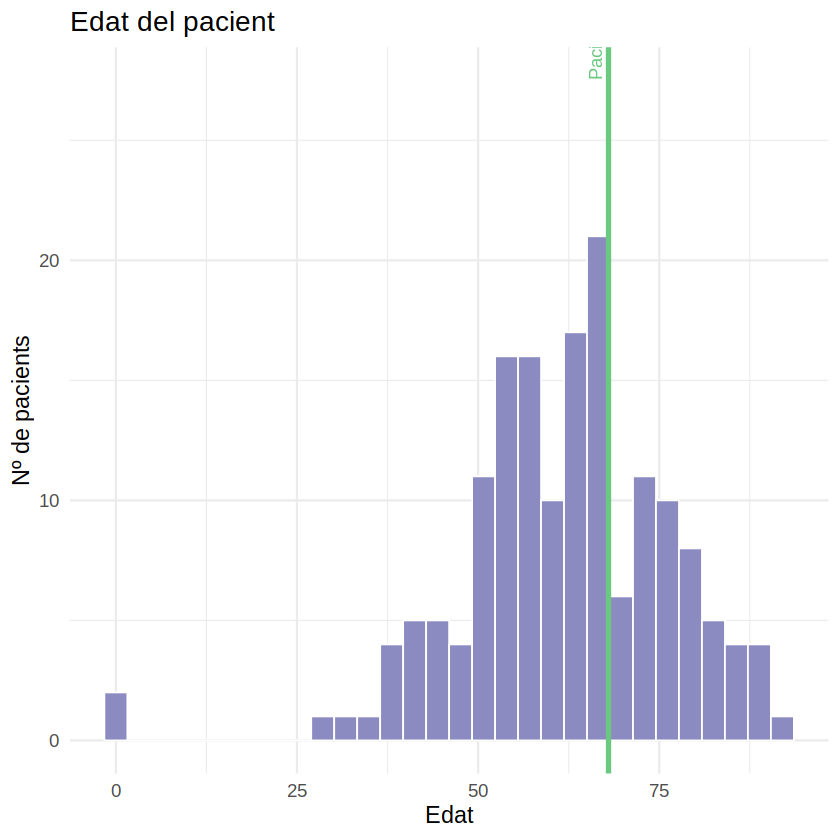

ERROR: Error in plot_var_with_patient_gg(data_train = data_train, data_pat = dat_pat, : Patient value for 'tamano_tumoral' is missing or not uniquely identified.


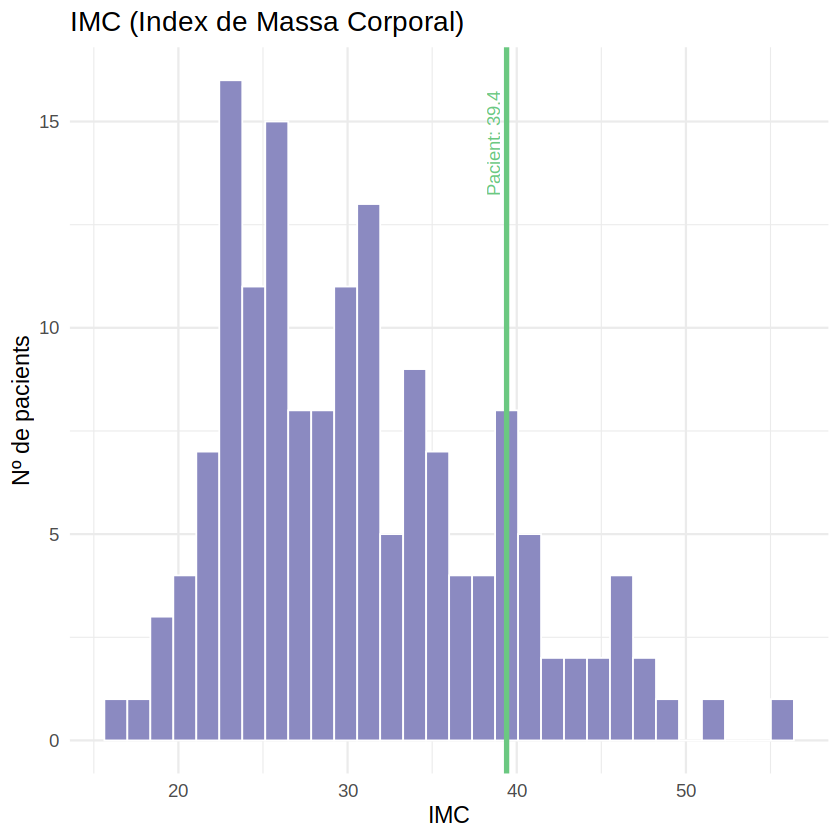

In [43]:
library(ggplot2)
library(dplyr)

data_train <- read_delim(
    "/home/natasamortvanski@vhio.org/CARE/app/IQ_Cancer_Endometrio_merged_NMSP.csv",
    delim = ";",
    show_col_types = FALSE
  )

dat_pat <- data_train[1,]


var <- "edad"

input_file <-  read_delim(
    "/home/natasamortvanski@vhio.org/CARE/app/test_input_file.txt",
    delim = "\t",
    show_col_types = FALSE
  )

var_pat <- input_file %>% pull(var)

plot_var_with_patient_gg <- function(data_train, data_pat, var,
                                     nbins = 30,
                                     title = NULL,
                                     xlab = NULL,
                                     patient_label = "Pacient") {
  # 1) Extract patient value for var
  var_pat <- data_pat %>% pull(.data[[var]])
  if (length(var_pat) != 1 || is.na(var_pat)) {
    stop("Patient value for '", var, "' is missing or not uniquely identified.")
  }

  # 2) Ensure var exists and is numeric in training
  if (!var %in% names(data_train)) stop("'", var, "' not found in data_train.")
  if (!is.numeric(data_train[[var]])) stop("'", var, "' must be numeric for a histogram.")

  # 3) Default labels
  if (is.null(title)) title <- var
  if (is.null(xlab))  xlab  <- var

  # 4) Compute y-axis max for patient line annotation
  h <- hist(data_train[[var]], plot = FALSE, breaks = nbins)
  y_max <- max(h$counts, na.rm = TRUE) * 1.1

  # 5) Build ggplot
  p <- ggplot(data_train, aes(x = .data[[var]])) +
    geom_histogram(bins = nbins, fill = "#8B8AC1", color = "white") +
    geom_vline(xintercept = var_pat, color = "#6BC881", size = 1.5) +
    annotate("text", x = var_pat, y = y_max, 
             label = paste0(patient_label, ": ", var_pat),
             color = "#6BC881", angle = 90, vjust = -0.5, hjust = 0) +
    labs(title = title, x = xlab, y = "Nº de pacients") +
    theme_minimal(base_size = 14)

  p
}

# Example usage:
plot_var_with_patient_gg(data_train = data_train,
                         data_pat = dat_pat,
                         var = "edad",
                         nbins = 30,
                         title = "Edat del pacient",
                         xlab = "Edat",
                         patient_label = "Pacient")

plot_var_with_patient_gg(data_train = data_train,
                         data_pat = dat_pat,
                         var = "imc",
                         nbins = 30,
                         title = "IMC (Index de Massa Corporal)",
                         xlab = "IMC",
                         patient_label = "Pacient")

plot_var_with_patient_gg(data_train = data_train,
                         data_pat = dat_pat,
                         var = "tamano_tumoral",
                         nbins = 30,
                         title = "Mida del tumor",
                         xlab = "Mida del tumor (cm)",
                         patient_label = "Pacient")


In [15]:
.libPaths(c(.libPaths(), "/home/natasamortvanski@vhio.org/miniconda3/envs/new_env/envs/care_shiny/lib/R/library"))

library(shiny)
library(ggplot2)
library(tidyverse)
library(bslib)
library(thematic)

# -------------------------------------------------------
# Python prediction wrapper
# -------------------------------------------------------
# predict_with_python <- function(x1, x2) {
#   python_path <- "/home/natasamortvanski@vhio.org/miniconda3/envs/new_env/envs/care_shiny/bin/python"
#   py_script  <- "/home/natasamortvanski@vhio.org/CARE/app/predict_model.py"

#   result <- tryCatch(
#     system2(
#       python_path,
#       args = c(py_script, as.character(x1), as.character(x2)),
#       stdout = TRUE,
#       stderr = TRUE
#     ),
#     error = function(e) e
#   )

#   print(result)

#   if (length(result) == 0 || !grepl(",", result[1])) {
#     return(list(score = NA_real_, group = NA_character_))
#   }

#   res <- strsplit(result[1], ",")[[1]]
#   list(
#     score = as.numeric(res[1]),
#     group = res[2]
#   )
# }
predict_with_python <- function(edad, tamano_tumoral, estadificacion) {
  python_path <- "/home/natasamortvanski@vhio.org/miniconda3/envs/new_env/envs/care_shiny/bin/python"
  py_script  <- "/home/natasamortvanski@vhio.org/CARE/app/predict_model.py"

  result <- tryCatch(
    system2(
      python_path,
      # args = c(py_script, as.character(edad), as.character(tamano_tumoral), as.character(estadificacion)),
      args = ,#file name that is output of sergio's script
      stdout = TRUE,
      stderr = TRUE
    ),
    error = function(e) e
  )

  print(result)

  if (length(result) == 0 || !grepl(",", result[1])) {
    return(list(score = NA_real_, group = NA_character_))
  }

  res <- strsplit(result[1], ",")[[1]]
  list(
    score = as.numeric(res[1]),
    group = res[2]
  )
}


# plot_var_with_patient_gg <- function(data_train, data_pat, var,
#                                      nbins = 30,
#                                      title = NULL,
#                                      xlab = NULL,
#                                      patient_label = "Pacient") {
#   # 1) Extract patient value for var
#   var_pat <- data_pat %>% pull(.data[[var]])
#   if (length(var_pat) != 1 || is.na(var_pat)) {
#     stop("Patient value for '", var, "' is missing or not uniquely identified.")
#   }

#   # 2) Ensure var exists and is numeric in training
#   if (!var %in% names(data_train)) stop("'", var, "' not found in data_train.")
#   if (!is.numeric(data_train[[var]])) stop("'", var, "' must be numeric for a histogram.")

#   # 3) Default labels
#   if (is.null(title)) title <- var
#   if (is.null(xlab))  xlab  <- var

#   # 4) Compute y-axis max for patient line annotation
#   h <- hist(data_train[[var]], plot = FALSE, breaks = nbins)
#   y_max <- max(h$counts, na.rm = TRUE) * 1.1

#   # 5) Build ggplot
#   p <- ggplot(data_train, aes(x = .data[[var]])) +
#     geom_histogram(bins = nbins, fill = "#8B8AC1", color = "white") +
#     geom_vline(xintercept = var_pat, color = "#6BC881", size = 1.5) +
#     annotate("text", x = var_pat, y = y_max, 
#              label = paste0(patient_label, ": ", var_pat),
#              color = "#6BC881", angle = 90, vjust = -0.5, hjust = 0) +
#     labs(title = title, x = xlab, y = "Nº de pacients") +
#     theme_minimal(base_size = 14)

#   p
# }

plot_var_with_patients_gg <- function(data_train, data_pat, var,
                                      nbins = 30,
                                      title = NULL,
                                      xlab = NULL,
                                      patient_label = "Patient") {

  # 1) Checks
  if (!var %in% names(data_train))
    stop("'", var, "' not found in data_train.")
  if (!is.numeric(data_train[[var]]))
    stop("'", var, "' must be numeric.")

  if (!var %in% names(data_pat))
    stop("'", var, "' not found in uploaded patient data.")

  # 2) Extract patient values (ALL rows)
  patient_vals <- data_pat %>%
    select(Patient_ID, value = .data[[var]]) %>%
    filter(!is.na(value))

  if (nrow(patient_vals) == 0)
    stop("No valid patient values for ", var)

  # 3) Default labels
  if (is.null(title)) title <- var
  if (is.null(xlab))  xlab  <- var

  # 4) Histogram stats
  h <- hist(data_train[[var]], plot = FALSE, breaks = nbins)
  y_max <- max(h$counts, na.rm = TRUE) #* 1.1

  # 5) Base histogram
  p <- ggplot(data_train, aes(x = .data[[var]])) +
    geom_histogram(
      bins = nbins,
      fill = "#8B8AC1",
      color = "white"
    ) +
    labs(
      title = title,
      x = xlab,
      y = "Nº de pacients"
    ) +
    theme_minimal(base_size = 14)+
    theme(
      axis.title.x = element_text(size = 18, face = "bold"),
      axis.title.y = element_text(size = 18, face = "bold"),
      axis.text.x  = element_text(size = 14),
      axis.text.y  = element_text(size = 14),
      plot.title   = element_text(size = 20, face = "bold", hjust = 0.5)
    )


  # 6) Add ONE vertical line per patient
  p <- p +
    geom_vline(
      data = patient_vals,
      aes(xintercept = value),
      color = "#6BC881",
      linewidth = 1,
      alpha = 0.7
    )

  # 7) Optional labels per patient
  p <- p +
    geom_text(
      data = patient_vals,
      aes(
        x = value,
        y = y_max*0.5,
        label = Patient_ID
      ),
      angle = 90,
      vjust = -0.5,
      hjust = 0,
      size = 5,
      fontface = "bold",  
      color = "#6BC881"
    )

  p
}


predict_batch <- function(df) {
  predictions <- list()
  
  for (i in 1:nrow(df)) {
    pred <- predict_with_python(
      df$edad[i],
      df$tamano_tumoral[i],
      df$imc[i]
    )
    predictions[[i]] <- data.frame(
      Patient_ID = df$Patient_ID[i],
      edad = df$edad[i],
      tamano_tumoral = df$tamano_tumoral[i],
      imc = df$imc[i],
      Score = pred$score,
      Group = pred$group,
      stringsAsFactors = FALSE
    )
  }
  
  bind_rows(predictions)
}


# -------------------------------------------------------
# UI
# -------------------------------------------------------
ui <- page_navbar(
  theme = bs_theme(bootswatch = "pulse"),
  position = "static-top",

  title = tags$h1(
    "CARE - Clinical Assessment of Risk in Endometrial Cancer",
    class = "h6 text-secondary",
    style = "font-size: 40px; font-weight: bold;"
  ),


  header = tags$style(HTML("
    .navbar { display: flex; align-items: center; }
    .navbar-brand { margin-right: auto !important; }
    .navbar-nav { margin-left: auto !important; }
    .navbar-nav .nav-link { font-size: 22px !important; font-weight: bold; }

    .value-box .card-header { font-size: 25px !important; font-weight: bold; }
    .value-box .card-body { font-size: 18px !important; }

    .full-height-sidebar {
      position: fixed;
      top: 95px;
      left: 0;
      width: 400px;
      height: calc(100vh - 70px);
      padding: 20px;
      background-color: #343a40;
      overflow-y: auto;
      color: white;
    }

    .main-content {
      margin-left: 420px;
      padding: 20px;
      margin-top: 70px;
    }

    /* Style for the preview table */
    .table {
      color: white !important;
      background-color: transparent !important;
    }
    
    .table td, .table th {
      color: white !important;
      border-color: #6c757d !important;
    }
    
    /* Scrollable table container */
    .table-container {
      max-height: 300px;
      overflow-y: auto;
      margin-top: 10px;
    }
    
    /* Target table text inside table-container */
    .table-container table {
      color: #2B344D !important;
    }
    
    .table-container table td,
    .table-container table th {
      color: #2B344D !important;
    }
    
    /* If you're using Bootstrap table-dark class, override it */
    .table-container .table-dark {
      --bs-table-color: #2B344D !important;
      --bs-table-bg: transparent !important;
    }
    
    .table-container .table-dark td,
    .table-container .table-dark th {
      color: #2B344D !important;
    }
    
    /* Alternative: target the specific table by ID if you have one */
    #predictionTable {
      color: #2B344D !important;
    }
    
    #predictionTable td,
    #predictionTable th {
      color: #2B344D !important;
    }
  ")),

  # ---------------------------------------------------
  # CARE APP TAB
  # ---------------------------------------------------
  nav_panel(
    "CARE App",

    div(
      class = "full-height-sidebar",

      div(
        "CARE is a clinical prognostic modeling tool for Endometrial Cancer, focused on patients defined as a Non-Specific Molecular Profile (NMSP).",
        style = "font-size: 28px;"
      ),

      br(), br(),

      div("Upload patient TSV file:", style = "font-size: 22px;"),
      br(),

      fileInput(
        "input_tsv",
        "TSV file (one or multiple rows)",
        accept = c(".tsv", ".txt")
      )

    ),

    div(
      class = "main-content",

      layout_columns(
        card(
          card_header(
            "Plot of regression",
            class = "h6 text-success",
            style = "font-size: 24px; font-weight: bold;"
          ),
          # plotOutput("scatterPlot", height = "600px")
          p('Here add some plot')
        ),
        
        card(
          card_header(
            "Prediction Results",
            class = "h6 text-success",
            style = "font-size: 24px; font-weight: bold;"
          ),
          div(
            class = "table-container",
            tableOutput("predictionTable")
            # p('Here put table with results of classifiaction')
          )
        ),

        value_box(
          title = "Number of Patients",
          textOutput("patientCount"),
          theme = "success"
        ),

        value_box(
          title = "Average Score",
          textOutput("averageScore"),
          theme = "secondary"
        ),
        
        value_box(
          title = "High Risk Patients",
          textOutput("highRiskCount"),
          theme = "danger"
        ),

        col_widths = c(8, 4, 4, 4, 4)
      )
    )
  ),

  # ---------------------------------------------------
  # DATA EXPLORATION TAB
  # ---------------------------------------------------
  nav_panel(
    "Data Exploration",
    fluidRow(
      layout_columns(
        card(
          card_header("Distribution of age", class = "h6 text-success"),
          plotOutput("plotEdad")
        ),
        card(
          card_header("Tumor size distribution", class = "h6 text-success"),
          plotOutput("plotTT")
        ),
        card(
          card_header("IMC distribution", class = "h6 text-success"),
          plotOutput("plotimc")
        ),
        col_widths = c(4, 4, 4)
      )
    )
  )
)

# -------------------------------------------------------
# SERVER
# -------------------------------------------------------
server <- function(input, output) {

  # ---------------------------------------------------
  # Read TSV input
  # ---------------------------------------------------
  uploaded_data <- reactive({
    req(input$input_tsv)

    # df <- read_tsv(
    #   input$input_tsv$datapath,
    #   show_col_types = FALSE
    # )

    if (str_ends(filename, 'tsv')) {
      df <- read_tsv(filename, na = 'NA')
    } else if (str_ends(filename, 'csv')) {
      df <- read_csv(filename, na = 'NA')
    } else if (str_ends(filename, 'x')) {
      df <- read_excel('~/Documents/hackathon-upc/data/IQ_Cancer_Endometrio_merged_NMSP.xlsx', na = 'NA')
    } else {
      stop(paste('ERROR! Invalid input file extenion', filename))
    }

    required_cols <- c("edad", "tamano_tumoral", "imc")
    validate(
      need(all(required_cols %in% colnames(df)),
          paste("TSV must contain columns:", paste(required_cols, collapse = ", ")))
    )

    # Add Patient_ID if not present
    if (!"Patient_ID" %in% colnames(df)) {
      df$Patient_ID <- paste0("Patient_", 1:nrow(df))
    }
    
    df
  })

  
  # ---------------------------------------------------
  # Get predictions for all patients
  # ---------------------------------------------------
  all_predictions <- reactive({
    req(uploaded_data())
    
    df <- uploaded_data()
    predictions <- predict_batch(df)
    
    predictions
  })
  
  # ---------------------------------------------------
  # Example dataset for plot
  # ---------------------------------------------------
  set.seed(123)
  n <- 100

  example_data <- data.frame(
    x1 = rnorm(n, mean = 50, sd = 10),
    x2 = rnorm(n, mean = 0, sd = 1)
  )

  example_data$score <- 0.5 * example_data$x1 + 2 * example_data$x2 + rnorm(n, sd = 5)
  median_score <- median(example_data$score)
  example_data$group <- ifelse(example_data$score >= median_score, "High", "Low")

  nmsp_2 <- read_delim(
    "/home/natasamortvanski@vhio.org/CARE/app/IQ_Cancer_Endometrio_merged_NMSP.csv",
    delim = ";",
    show_col_types = FALSE
  )
  
  # # ------------- --------------------------------------
  # # Main plot with multiple patients - FIXED VERSION
  # # ---------------------------------------------------
  # output$scatterPlot <- renderPlot({
  #   req(uploaded_data(), all_predictions())
    
  #   df <- uploaded_data()
  #   predictions <- all_predictions()
    
  #   # Create a color palette for patients
  #   n_patients <- nrow(predictions)
    
    
  #   # Create a separate data frame for patient annotations
  #   patient_annotations <- predictions %>%
  #     mutate(Patient_ID = factor(Patient_ID, levels = Patient_ID))
    
  #   # Create the base plot with example data
  #   p <- ggplot(example_data, aes(x = x1, y = score)) +
  #     geom_point(aes(color = group), alpha = 0.4, size = 2) +
  #     geom_hline(yintercept = median_score, linetype = "dashed", color = "gray50") +
  #     labs(
  #       title = paste("Linear regression dataset with", n_patients, "patient prediction(s)"),
  #       x = "x1",
  #       y = "Score"
  #     ) +
  #     theme_minimal() +
  #     theme(
  #       axis.title = element_text(size = 16, face = "bold"),
  #       axis.text  = element_text(size = 14),
  #       legend.position = "bottom"
  #     ) +
  #     scale_color_manual(
  #       name = "Example Data",
  #       values = c("High" = "#E41A1C", "Low" = "#377EB8"),
  #       guide = guide_legend(order = 1)
  #     )
    
  #   # Add patient points with different shapes
  #   for (i in 1:nrow(patient_annotations)) {
  #     patient_id <- as.character(patient_annotations$Patient_ID[i])
  #     # patient_color <- patient_color_list[[patient_id]]
  #     patient_color <- '#6BC881'
      
  #     p <- p + 
  #       annotate(
  #         "point",
  #         x = patient_annotations$x1[i],
  #         y = patient_annotations$Score[i],
  #         color = patient_color,
  #         size = 6,
  #         shape = 17  # Triangle shape
  #       )
      
  #     # Add patient labels if enabled
  #     if (input$show_labels) {
  #       p <- p + 
  #         annotate(
  #           "text",
  #           x = patient_annotations$x1[i],
  #           y = patient_annotations$Score[i] + 0.5,
  #           label = patient_id,
  #           color = patient_color,
  #           size = 4,
  #           hjust = 0.5,
  #           vjust = -0.5,
  #           fontface = "bold"
  #         )
  #     }
  #   }
    
  #   p
  # })
  
  # ---------------------------------------------------
  # Prediction results table
  # ---------------------------------------------------
  output$predictionTable <- renderTable({
    req(all_predictions())
    
    all_predictions() %>%
      mutate(
        Score = round(Score, 3),
        Group = factor(Group, levels = c("Low", "High"))
      ) %>%
      arrange(desc(Score))
  }, 
  striped = TRUE,
  hover = TRUE,
  bordered = TRUE,
  align = 'c',
  width = '100%')
  
  # ---------------------------------------------------
  # Summary statistics
  # ---------------------------------------------------
  output$patientCount <- renderText({
    req(uploaded_data())
    paste(nrow(uploaded_data()), "patient(s)")
  })
  
  output$averageScore <- renderText({
    req(all_predictions())
    round(mean(all_predictions()$Score, na.rm = TRUE), 3)
  })
  
  output$highRiskCount <- renderText({
    req(all_predictions())
    sum(all_predictions()$Group == "High", na.rm = TRUE)
  })

    # ---------------------------------------------------
    # Data exploration plots with patient value
    # ---------------------------------------------------
    output$plotEdad <- renderPlot({
      req(uploaded_data())
      plot_var_with_patients_gg(
        data_train = nmsp_2,
        data_pat = uploaded_data(),
        var = "edad",
        nbins = 30,
        title = "",
        xlab = "Edat"
      )
    })


    output$plotTT <- renderPlot({
      req(uploaded_data())
      plot_var_with_patients_gg(
        data_train = nmsp_2,
        data_pat = uploaded_data(),
        var = "tamano_tumoral",
        nbins = 30,
        title = "",
        xlab = "Tamany tumoral"
      )
    })


    output$plotimc <- renderPlot({
      req(uploaded_data())
      plot_var_with_patients_gg(
        data_train = nmsp_2,
        data_pat = uploaded_data(),
        var = "imc",
        nbins = 30,
        title = "",
        xlab = "IMC"
      )
    })


}

shinyApp(ui = ui, server = server)


Listening on http://127.0.0.1:5273

Warning message:
“Removed 31 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 8 rows containing non-finite outside the scale range (`stat_bin()`).”


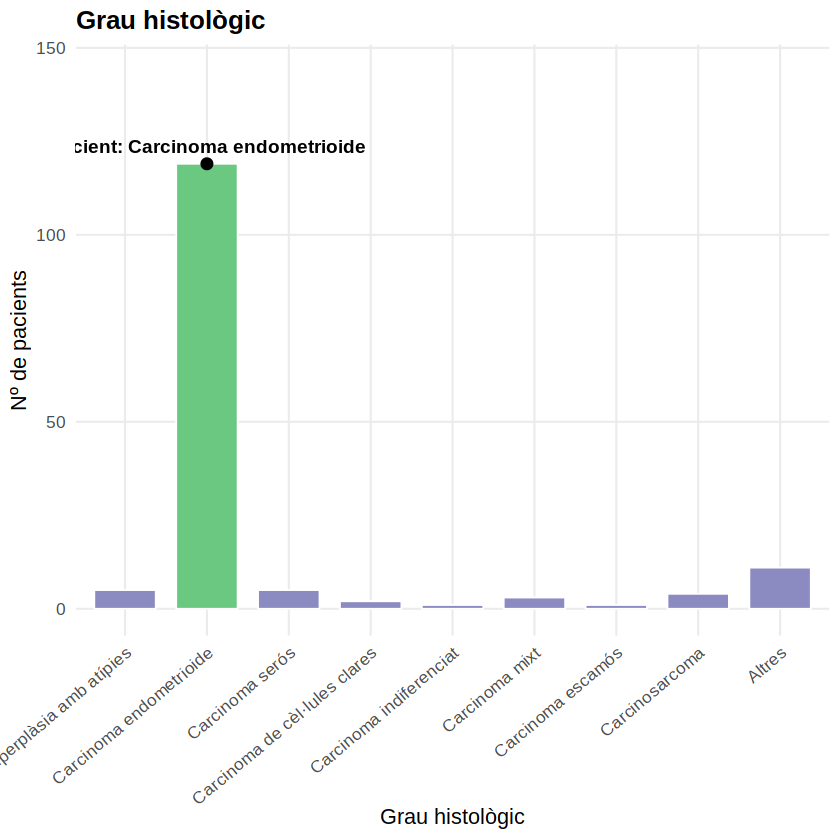

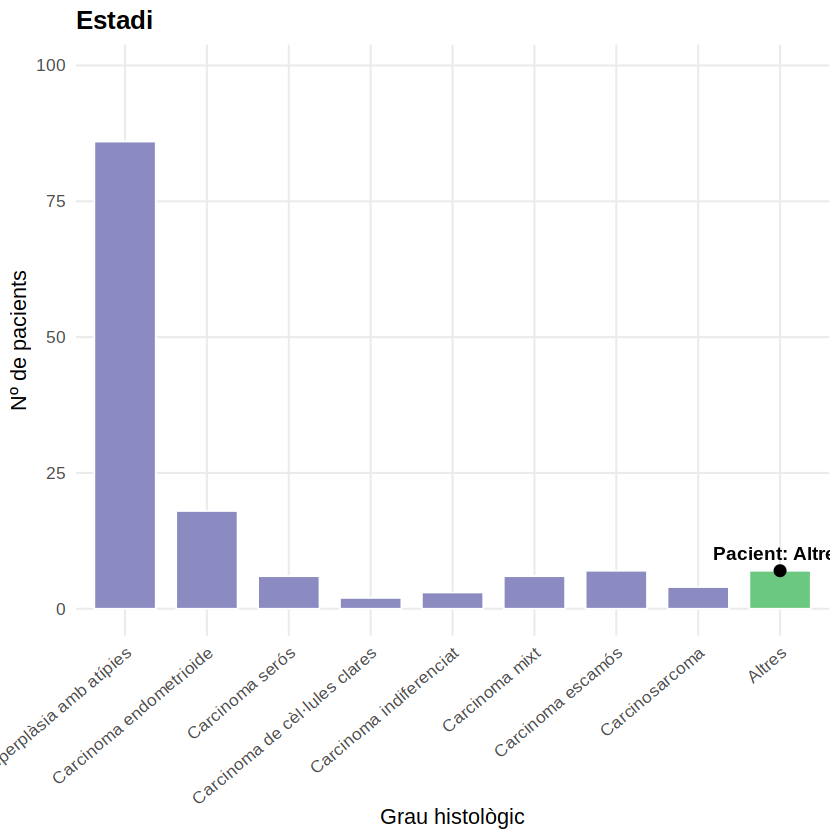

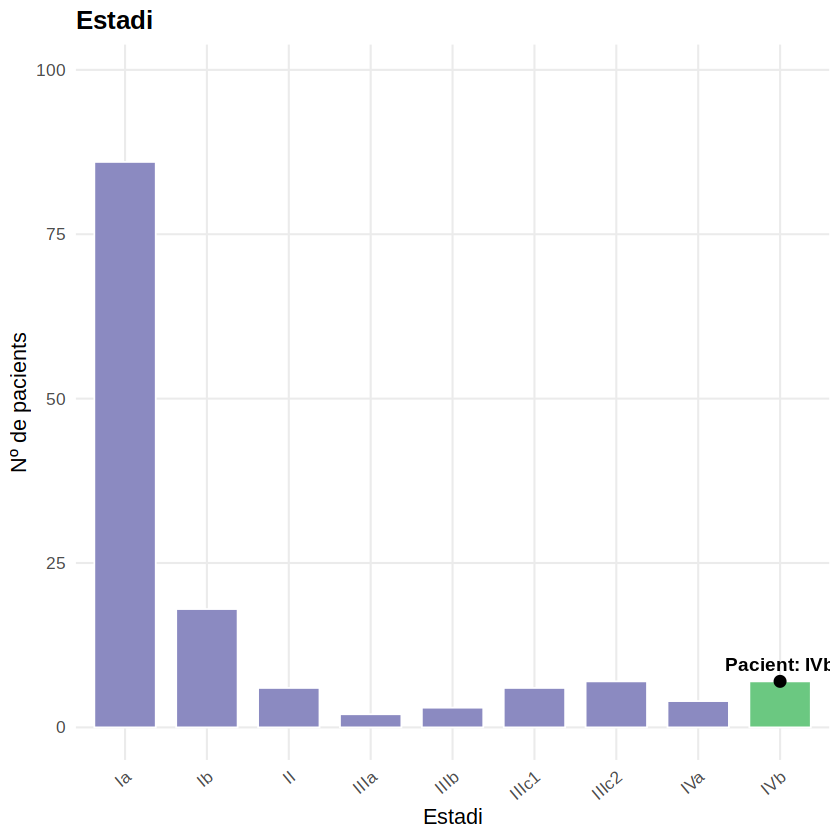

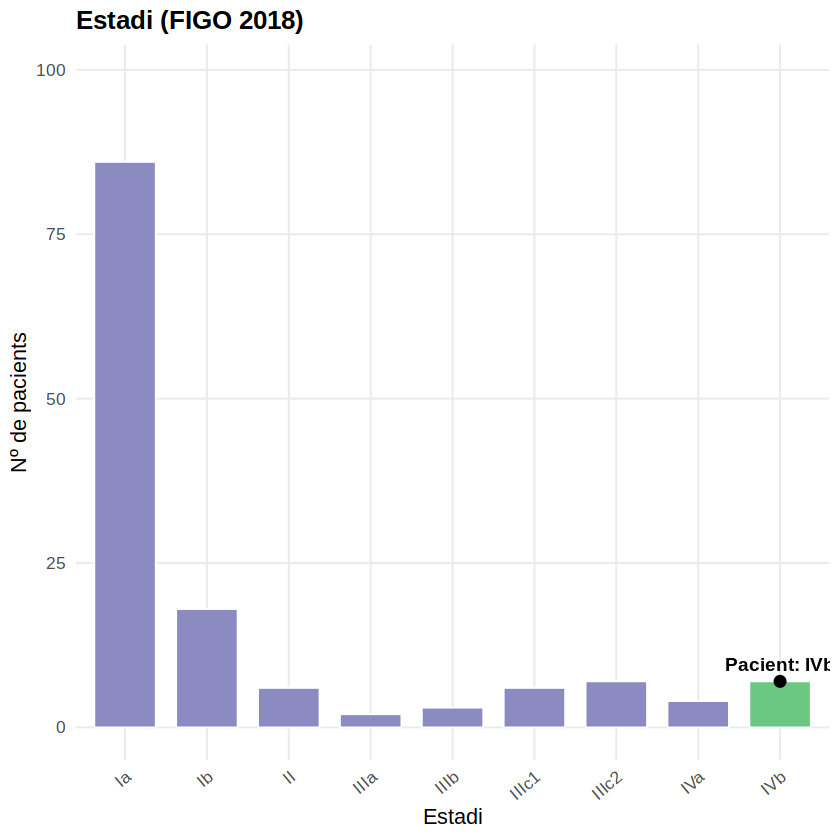

In [16]:
library(ggplot2)
library(dplyr)

data_train <- read_delim(
    "/home/natasamortvanski@vhio.org/CARE/app/IQ_Cancer_Endometrio_merged_NMSP.csv",
    delim = ";",
    show_col_types = FALSE
  )

dat_pat <- data_train[1,]


var <- "edad"

input_file <-  read_delim(
    "/home/natasamortvanski@vhio.org/CARE/app/test_input_file.txt",
    delim = "\t",
    show_col_types = FALSE
  )

var_pat <- input_file %>% pull(var)

plot_cat_with_patient_gg <- function(data_train, data_pat, var,
                                     title = NULL,
                                     xlab = NULL,
                                     x_labels = NULL,
                                     patient_label = "Pacient",
                                     angle = 45) {
  
  # 1) Patient category
  var_pat <- data_pat %>% pull(.data[[var]])
  stopifnot(length(var_pat) == 1, !is.na(var_pat))
  
  var_pat_chr <- as.character(var_pat)
  
  # 2) Counts (drop NA)
  df_counts <- data_train %>%
    mutate(.cat = as.character(.data[[var]])) %>%
    filter(!is.na(.cat)) %>%
    count(.cat, name = "n") %>%
    mutate(is_patient = (.cat == var_pat_chr))
  
  # Patient category must exist in train categories to mark it
  if (!any(df_counts$is_patient)) {
    stop("Patient category ('", var_pat_chr, "') not found in training data for var='", var, "'.")
  }
  
  # 3) Labels / ordering
  if (is.null(title)) title <- var
  if (is.null(xlab))  xlab  <- var
  
  # Decide x scale limits and labels
  if (!is.null(x_labels)) {
    # Keep only categories that exist in data (prevents empty levels)
    limits_use <- intersect(names(x_labels), df_counts$.cat)
    df_counts <- df_counts %>% filter(.cat %in% limits_use)
    
    x_scale <- scale_x_discrete(
      limits = limits_use,
      labels = x_labels
    )
    
    # Label to display for patient mark
    patient_cat_label <- unname(x_labels[var_pat_chr])
    if (is.na(patient_cat_label)) patient_cat_label <- var_pat_chr
  } else {
    x_scale <- scale_x_discrete()
    patient_cat_label <- var_pat_chr
  }
  
  # 4) Patient mark position
  y_top <- max(df_counts$n, na.rm = TRUE)
  y_mark <- df_counts$n[df_counts$is_patient] * 1.05  # slightly above the patient bar
  
  # 5) Plot
  ggplot(df_counts, aes(x = .cat, y = n, fill = is_patient)) +
    geom_col(color = "white", width = 0.75) +
    # Patient marker: point + label above the bar
    geom_point(
      data = df_counts %>% filter(is_patient),
      aes(x = .cat, y = n),
      inherit.aes = FALSE,
      size = 3
    ) +
    geom_text(
      data = df_counts %>% filter(is_patient),
      aes(x = .cat, y = n, label = paste0(patient_label, ": ", patient_cat_label)),
      inherit.aes = FALSE,
      vjust = -0.8,
      fontface = "bold",
      size = 4
    ) +
    scale_fill_manual(
      values = c("FALSE" = "#8B8AC1", "TRUE" = "#6BC881"),
      guide = "none"
    ) +
    x_scale +
    coord_cartesian(ylim = c(0, max(y_top, y_mark) * 1.15)) +
    labs(
      title = title,
      x = xlab,
      y = "Nº de pacients"
    ) +
    theme_minimal(base_size = 13) +
    theme(
      plot.title = element_text(face = "bold"),
      panel.grid.minor = element_blank(),
      axis.text.x = element_text(angle = angle, hjust = 1, vjust = 1)
    )
}




labels_histologia <- c(
  "1" = "Hiperplàsia amb atípies",
  "2" = "Carcinoma endometrioide",
  "3" = "Carcinoma serós",
  "4" = "Carcinoma de cèl·lules clares",
  "5" = "Carcinoma indiferenciat",
  "6" = "Carcinoma mixt",
  "7" = "Carcinoma escamós",
  "8" = "Carcinosarcoma",
  "9" = "Altres"
)


plot_cat_with_patient_gg(data_train = data_train , 
                      data_pat = dat_pat, 
                      var = "histo_defin",
                      title = "Grau histològic",
                      xlab = "Grau histològic",
                      patient_label = "Pacient",
                      x_labels =labels_histologia,
                      angle = 40
)



labels_histologia <- c(
  "1" = "Hiperplàsia amb atípies",
  "2" = "Carcinoma endometrioide",
  "3" = "Carcinoma serós",
  "4" = "Carcinoma de cèl·lules clares",
  "5" = "Carcinoma indiferenciat",
  "6" = "Carcinoma mixt",
  "7" = "Carcinoma escamós",
  "8" = "Carcinosarcoma",
  "9" = "Altres"
)
plot_cat_with_patient_gg(data_train = data_train , 
                         data_pat = dat_pat, 
                         var = "estadificacion_",
                         title = "Estadi",
                         xlab = "Grau histològic",
                         patient_label = "Pacient",
                         x_labels =labels_histologia,
                         angle = 40
)

labels <- labels_stage <- c(
  "1" = "Ia",
  "2" = "Ib",
  "3" = "II",
  "4" = "IIIa",
  "5" = "IIIb",
  "6" = "IIIc1",
  "7" = "IIIc2",
  "8" = "IVa",
  "9" = "IVb"
)

plot_cat_with_patient_gg(data_train = data_train , 
                         data_pat = dat_pat, 
                         var = "estadificacion_",
                         title = "Estadi",
                         xlab = "Estadi",
                         patient_label = "Pacient",
                         x_labels =labels,
                         angle = 40
)


labels <- labels_stage <- c(
  "1" = "Ia",
  "2" = "Ib",
  "3" = "II",
  "4" = "IIIa",
  "5" = "IIIb",
  "6" = "IIIc1",
  "7" = "IIIc2",
  "8" = "IVa",
  "9" = "IVb"
)

plot_cat_with_patient_gg(data_train = data_train, 
                         data_pat = dat_pat, 
                         var = "estadificacion_",
                         title = "Estadi (FIGO 2018)",
                         xlab = "Estadi",
                         patient_label = "Pacient",
                         x_labels =labels,
                         angle = 40
)

In [4]:

data_train <- read_delim(
    "/home/natasamortvanski@vhio.org/CARE/app/IQ_Cancer_Endometrio_merged_NMSP.csv",
    delim = ";",
    show_col_types = FALSE
  )

# Select columns and third row
patient_row <- data_train %>%
  # select(tamano_tumoral, edad, imc, histo_defin, estadificacion_) %>%
  slice(3:4)  # third row

patient_row
# Export as TSV
write_tsv(patient_row, "/home/natasamortvanski@vhio.org/CARE/app/test_input_file.txt")


codigo_participante,recidiva,recidiva_exitus,diferencia_dias_reci_exit,causa_muerte,f_diag,fecha_de_recidi,f_muerte,visita_control,Ultima_fecha,⋯,bt_realPac,ini_bqt_rt,final_bqt_rt,qt,Tratamiento_sistemico_realizad,inicio_qmt,fecha_final_qmt,otros_tt,tt_o_f_ini,tt_o_f_fin
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<chr>,<chr>,<chr>,<date>,⋯,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<lgl>
8,0,0,1769,NA,2020-07-16,NA,NA,20/05/2025,2025-05-20,⋯,NA,NA,NA,0,NA,NA,NA,NA,NA,NA
9,1,1,1003,NA,2021-02-22,22/11/2023,NA,27/10/2025,2023-11-22,⋯,1,08/10/2021,12/11/2021,1,2,06/05/2021,20/08/2021,NA,NA,NA


## With plots of categorical data

In [22]:
.libPaths(c(.libPaths(), "/home/natasamortvanski@vhio.org/miniconda3/envs/new_env/envs/care_shiny/lib/R/library"))

library(shiny)
library(ggplot2)
library(tidyverse)
library(bslib)
library(thematic)

# -------------------------------------------------------
# Python prediction wrapper
# -------------------------------------------------------
predict_with_python <- function(edad, tamano_tumoral, estadificacion) {
  python_path <- "/home/natasamortvanski@vhio.org/miniconda3/envs/new_env/envs/care_shiny/bin/python"
  py_script  <- "/home/natasamortvanski@vhio.org/CARE/app/predict_model.py"

  result <- tryCatch(
    system2(
      python_path,
      args = c(py_script, as.character(edad), as.character(tamano_tumoral), as.character(estadificacion)),
      stdout = TRUE,
      stderr = TRUE
    ),
    error = function(e) e
  )

  print(result)

  if (length(result) == 0 || !grepl(",", result[1])) {
    return(list(score = NA_real_, group = NA_character_))
  }

  res <- strsplit(result[1], ",")[[1]]
  list(
    score = as.numeric(res[1]),
    group = res[2]
  )
}

# -------------------------------------------------------
# Plot functions
# -------------------------------------------------------
plot_var_with_patients_gg <- function(data_train, data_pat, var,
                                      nbins = 30,
                                      title = NULL,
                                      xlab = NULL,
                                      patient_label = "Patient") {

  # 1) Checks
  if (!var %in% names(data_train))
    stop("'", var, "' not found in data_train.")
  if (!is.numeric(data_train[[var]]))
    stop("'", var, "' must be numeric.")

  if (!var %in% names(data_pat))
    stop("'", var, "' not found in uploaded patient data.")

  # 2) Extract patient values (ALL rows)
  patient_vals <- data_pat %>%
    select(Patient_ID, value = .data[[var]]) %>%
    filter(!is.na(value))

  if (nrow(patient_vals) == 0)
    stop("No valid patient values for ", var)

  # 3) Default labels
  if (is.null(title)) title <- var
  if (is.null(xlab))  xlab  <- var

  # 4) Histogram stats
  h <- hist(data_train[[var]], plot = FALSE, breaks = nbins)
  y_max <- max(h$counts, na.rm = TRUE)

  # 5) Base histogram
  p <- ggplot(data_train, aes(x = .data[[var]])) +
    geom_histogram(
      bins = nbins,
      fill = "#8B8AC1",
      color = "white"
    ) +
    labs(
      title = title,
      x = xlab,
      y = "Nº de pacients"
    ) +
    theme_minimal(base_size = 14) +
    theme(
      axis.title.x = element_text(size = 18, face = "bold"),
      axis.title.y = element_text(size = 18, face = "bold"),
      axis.text.x  = element_text(size = 14),
      axis.text.y  = element_text(size = 14),
      plot.title   = element_text(size = 20, face = "bold", hjust = 0.5)
    )

  # 6) Add ONE vertical line per patient
  p <- p +
    geom_vline(
      data = patient_vals,
      aes(xintercept = value),
      color = "#6BC881",
      linewidth = 1,
      alpha = 0.7
    )

  # 7) Optional labels per patient
  p <- p +
    geom_text(
      data = patient_vals,
      aes(
        x = value,
        y = y_max*0.5,
        label = Patient_ID
      ),
      angle = 90,
      vjust = -0.5,
      hjust = 0,
      size = 5,
      fontface = "bold",  
      color = "#6BC881"
    )

  p
}

# NEW FUNCTION: Categorical plot with patient
plot_cat_with_patient_gg <- function(data_train, data_pat, var,
                                     title = NULL,
                                     xlab = NULL,
                                     x_labels = NULL,
                                     patient_label = "Patient",
                                     angle = 45) {
  
  # 1) Check if variable exists
  if (!var %in% names(data_train))
    stop("'", var, "' not found in data_train.")
  
  if (!var %in% names(data_pat))
    stop("'", var, "' not found in uploaded patient data.")
  
  # 2) Extract patient values (ALL rows)
  patient_vals <- data_pat %>%
    select(Patient_ID, value = .data[[var]]) %>%
    mutate(value = as.character(value)) %>%
    filter(!is.na(value))
  
  if (nrow(patient_vals) == 0)
    stop("No valid patient values for ", var)
  
  # 3) Default labels
  if (is.null(title)) title <- var
  if (is.null(xlab))  xlab  <- var
  
  # 4) Counts (drop NA)
  df_counts <- data_train %>%
    mutate(.cat = as.character(.data[[var]])) %>%
    filter(!is.na(.cat)) %>%
    count(.cat, name = "n") %>%
    mutate(is_patient = (.cat %in% patient_vals$value))
  
  # Check if patient categories exist in training data
  missing_pat_cats <- setdiff(patient_vals$value, df_counts$.cat)
  if (length(missing_pat_cats) > 0) {
    warning("Patient category(ies) '", paste(missing_pat_cats, collapse = "', '"), 
            "' not found in training data for var='", var, "'.")
  }
  
  # 5) Decide x scale limits and labels
  if (!is.null(x_labels)) {
    # Keep only categories that exist in data (prevents empty levels)
    limits_use <- intersect(names(x_labels), df_counts$.cat)
    df_counts <- df_counts %>% filter(.cat %in% limits_use)
    
    x_scale <- scale_x_discrete(
      limits = limits_use,
      labels = x_labels
    )
  } else {
    x_scale <- scale_x_discrete()
  }
  
  # 6) Create base plot
  p <- ggplot(df_counts, aes(x = .cat, y = n, fill = is_patient)) +
    geom_col(color = "white", width = 0.75) +
    scale_fill_manual(
      values = c("FALSE" = "#8B8AC1", "TRUE" = "#6BC881"),
      guide = "none"
    ) +
    x_scale +
    labs(
      title = title,
      x = xlab,
      y = "Nº de pacients"
    ) +
    theme_minimal(base_size = 14) +
    theme(
      axis.title.x = element_text(size = 18, face = "bold"),
      axis.title.y = element_text(size = 18, face = "bold"),
      axis.text.x  = element_text(size = 14, angle = angle, hjust = 1, vjust = 1),
      axis.text.y  = element_text(size = 14),
      plot.title   = element_text(size = 20, face = "bold", hjust = 0.5),
      panel.grid.minor = element_blank()
    )
  
  # 7) Add patient markers for each patient
  for (i in 1:nrow(patient_vals)) {
    patient_id <- patient_vals$Patient_ID[i]
    patient_cat <- patient_vals$value[i]
    
    # Find the bar for this patient's category
    patient_bar <- df_counts %>% filter(.cat == patient_cat)
    
    if (nrow(patient_bar) > 0) {
      # Add patient marker (point at top of bar)
      p <- p +
        annotate(
          "point",
          x = patient_cat,
          y = patient_bar$n[1],
          color = "#6BC881",
          size = 3
        ) +
        annotate(
          "text",
          x = patient_cat,
          y = patient_bar$n[1] * 1.05,
          label = paste0(patient_id, ": ", 
                        ifelse(!is.null(x_labels) && patient_cat %in% names(x_labels),
                               x_labels[patient_cat],
                               patient_cat)),
          color = "#6BC881",
          vjust = -0.8,
          fontface = "bold",
          size = 4
        )
    }
  }
  
  # Adjust y-axis to accommodate labels
  y_max <- max(df_counts$n, na.rm = TRUE)
  p <- p + coord_cartesian(ylim = c(0, y_max * 1.2))
  
  p
}

# -------------------------------------------------------
# Prediction batch function
# -------------------------------------------------------
predict_batch <- function(df) {
  predictions <- list()
  
  for (i in 1:nrow(df)) {
    pred <- predict_with_python(
      df$edad[i],
      df$tamano_tumoral[i],
      df$imc[i]
    )
    predictions[[i]] <- data.frame(
      Patient_ID = df$Patient_ID[i],
      edad = df$edad[i],
      tamano_tumoral = df$tamano_tumoral[i],
      imc = df$imc[i],
      Score = pred$score,
      Group = pred$group,
      stringsAsFactors = FALSE
    )
  }
  
  bind_rows(predictions)
}

# -------------------------------------------------------
# UI
# -------------------------------------------------------
ui <- page_navbar(
  theme = bs_theme(bootswatch = "pulse"),
  position = "static-top",

  title = tags$h1(
    "CARE - Clinical Assessment of Risk in Endometrial Cancer",
    class = "h6 text-secondary",
    style = "font-size: 40px; font-weight: bold;"
  ),

  header = tags$style(HTML("
    .navbar { display: flex; align-items: center; }
    .navbar-brand { margin-right: auto !important; }
    .navbar-nav { margin-left: auto !important; }
    .navbar-nav .nav-link { font-size: 22px !important; font-weight: bold; }

    .value-box .card-header { font-size: 25px !important; font-weight: bold; }
    .value-box .card-body { font-size: 18px !important; }

    .full-height-sidebar {
      position: fixed;
      top: 95px;
      left: 0;
      width: 400px;
      height: calc(100vh - 70px);
      padding: 20px;
      background-color: #343a40;
      overflow-y: auto;
      color: white;
    }

    .main-content {
      margin-left: 420px;
      padding: 20px;
      margin-top: 70px;
    }

    /* Style for the preview table */
    .table {
      color: white !important;
      background-color: transparent !important;
    }
    
    .table td, .table th {
      color: white !important;
      border-color: #6c757d !important;
    }
    
    /* Scrollable table container */
    .table-container {
      max-height: 300px;
      overflow-y: auto;
      margin-top: 10px;
    }
    
    /* Target table text inside table-container */
    .table-container table {
      color: #2B344D !important;
    }
    
    .table-container table td,
    .table-container table th {
      color: #2B344D !important;
    }
    
    /* If you're using Bootstrap table-dark class, override it */
    .table-container .table-dark {
      --bs-table-color: #2B344D !important;
      --bs-table-bg: transparent !important;
    }
    
    .table-container .table-dark td,
    .table-container .table-dark th {
      color: #2B344D !important;
    }
    
    /* Alternative: target the specific table by ID if you have one */
    #predictionTable {
      color: #2B344D !important;
    }
    
    #predictionTable td,
    #predictionTable th {
      color: #2B344D !important;
    }
  ")),

  # ---------------------------------------------------
  # CARE APP TAB
  # ---------------------------------------------------
  nav_panel(
    "CARE App",

    div(
      class = "full-height-sidebar",

      div(
        "CARE is a clinical prognostic modeling tool for Endometrial Cancer, focused on patients defined as a Non-Specific Molecular Profile (NMSP).",
        style = "font-size: 28px;"
      ),

      br(), br(),

      div("Upload patient TSV file:", style = "font-size: 22px;"),
      br(),

      fileInput(
        "input_tsv",
        "TSV file (one or multiple rows)",
        accept = c(".tsv", ".txt")
      )

    ),

    div(
      class = "main-content",

      layout_columns(
        # card(
        #   card_header(
        #     "Plot of regression",
        #     class = "h6 text-success",
        #     style = "font-size: 24px; font-weight: bold;"
        #   ),
        #   p('Here add some plot')
        # ),
        
        card(
          card_header(
            "Prediction Results",
            class = "h6 text-success",
            style = "font-size: 24px; font-weight: bold;"
          ),
          div(
            class = "table-container",
            tableOutput("predictionTable")
          )
        ),

        value_box(
          title = "Number of Patients",
          textOutput("patientCount"),
          theme = "success"
        ),

        value_box(
          title = "Average Score",
          textOutput("averageScore"),
          theme = "secondary"
        ),
        
        value_box(
          title = "High Risk Patients",
          textOutput("highRiskCount"),
          theme = "danger"
        ),

        col_widths = c(12, 4, 4, 4)
      )
    )
  ),

  # ---------------------------------------------------
  # DATA EXPLORATION TAB - UPDATED
  # ---------------------------------------------------
  nav_panel(
    "Data Exploration",
    fluidRow(
      # First row: Continuous variables
      layout_columns(
        card(
          card_header("Distribution of age", class = "h6 text-success"),
          plotOutput("plotEdad")
        ),
        card(
          card_header("Tumor size distribution", class = "h6 text-success"),
          plotOutput("plotTT")
        ),
        card(
          card_header("IMC distribution", class = "h6 text-success"),
          plotOutput("plotimc")
        ),
        col_widths = c(4, 4, 4)
      ),
      
      # Second row: Categorical variables
      layout_columns(
        card(
          card_header("Histological type", class = "h6 text-success"),
          plotOutput("plotHistologia")
        ),
        card(
          card_header("Tumor stage (FIGO 2018)", class = "h6 text-success"),
          plotOutput("plotEstadio")
        ),
        card(
          card_header("Histological grade", class = "h6 text-success"),
          plotOutput("plotGrado")
        ),
        col_widths = c(4, 4, 4)
      )
    )
  )
)

# -------------------------------------------------------
# SERVER
# -------------------------------------------------------
server <- function(input, output) {

  # ---------------------------------------------------
  # Read TSV input
  # ---------------------------------------------------
  uploaded_data <- reactive({
    req(input$input_tsv)

    # df <- read_tsv(
    #   input$input_tsv$datapath,
    #   show_col_types = FALSE
    # )
    if (str_ends(filename, 'tsv')) {
      df <- read_tsv(filename, na = 'NA')
    } else if (str_ends(filename, 'csv')) {
      df <- read_csv(filename, na = 'NA')
    } else if (str_ends(filename, 'x')) {
      df <- read_excel('~/Documents/hackathon-upc/data/IQ_Cancer_Endometrio_merged_NMSP.xlsx', na = 'NA')
    } else {
      stop(paste('ERROR! Invalid input file extenion', filename))
    }

    required_cols <- c("edad", "tamano_tumoral", "imc")
    validate(
      need(all(required_cols %in% colnames(df)),
          paste("TSV must contain columns:", paste(required_cols, collapse = ", ")))
    )

    # Add Patient_ID if not present
    if (!"Patient_ID" %in% colnames(df)) {
      df$Patient_ID <- paste0("Patient_", 1:nrow(df))
    }
    
    source("/home/natasamortvanski@vhio.org/CARE/app/parse_test.R", local = TRUE, args = list(df = df), out_filename = '/home/natasamortvanski@vhio.org/CARE/app/tmp_files/parsed_data.tsv') ##### UPLOAD SERGIO'S FILE AND OUTPUT PARSED FILE

    df
  })

  # ---------------------------------------------------
  # Get predictions for all patients
  # ---------------------------------------------------
  all_predictions <- reactive({
    req(uploaded_data())
    
    df <- uploaded_data()
    predictions <- predict_batch(df)
    
    predictions
  })
  
  # ---------------------------------------------------
  # Load NMSP data
  # ---------------------------------------------------
  nmsp_2 <- reactive({
    read_delim(
      "/home/natasamortvanski@vhio.org/CARE/app/IQ_Cancer_Endometrio_merged_NMSP.csv",
      delim = ";",
      show_col_types = FALSE
    )
  })
  
  # ---------------------------------------------------
  # Label definitions for categorical plots
  # ---------------------------------------------------
  labels_histologia <- list(
    "1" = "Hiperplàsia amb atípies",
    "2" = "Carcinoma endometrioide",
    "3" = "Carcinoma serós",
    "4" = "Carcinoma de cèl·lules clares",
    "5" = "Carcinoma indiferenciat",
    "6" = "Carcinoma mixt",
    "7" = "Carcinoma escamós",
    "8" = "Carcinosarcoma",
    "9" = "Altres"
  )
  
  labels_stage <- list(
    "1" = "Ia",
    "2" = "Ib",
    "3" = "II",
    "4" = "IIIa",
    "5" = "IIIb",
    "6" = "IIIc1",
    "7" = "IIIc2",
    "8" = "IVa",
    "9" = "IVb"
  )
  
  labels_grado <- list(
    "1" = "Grado 1",
    "2" = "Grado 2",
    "3" = "Grado 3"
  )

  # ---------------------------------------------------
  # Prediction results table
  # ---------------------------------------------------
  output$predictionTable <- renderTable({
    req(all_predictions())
    
    all_predictions() %>%
      mutate(
        Score = round(Score, 3),
        Group = factor(Group, levels = c("Low", "High"))
      ) %>%
      arrange(desc(Score))
  }, 
  striped = TRUE,
  hover = TRUE,
  bordered = TRUE,
  align = 'c',
  width = '100%')
  
  # ---------------------------------------------------
  # Summary statistics
  # ---------------------------------------------------
  output$patientCount <- renderText({
    req(uploaded_data())
    paste(nrow(uploaded_data()), "patient(s)")
  })
  
  output$averageScore <- renderText({
    req(all_predictions())
    round(mean(all_predictions()$Score, na.rm = TRUE), 3)
  })
  
  output$highRiskCount <- renderText({
    req(all_predictions())
    sum(all_predictions()$Group == "High", na.rm = TRUE)
  })

  # ---------------------------------------------------
  # Data exploration plots - Continuous variables
  # ---------------------------------------------------
  output$plotEdad <- renderPlot({
    req(uploaded_data())
    plot_var_with_patients_gg(
      data_train = nmsp_2(),
      data_pat = uploaded_data(),
      var = "edad",
      nbins = 30,
      title = "",
      xlab = "Edat"
    )
  })

  output$plotTT <- renderPlot({
    req(uploaded_data())
    plot_var_with_patients_gg(
      data_train = nmsp_2(),
      data_pat = uploaded_data(),
      var = "tamano_tumoral",
      nbins = 30,
      title = "",
      xlab = "Tamany tumoral"
    )
  })

  output$plotimc <- renderPlot({
    req(uploaded_data())
    plot_var_with_patients_gg(
      data_train = nmsp_2(),
      data_pat = uploaded_data(),
      var = "imc",
      nbins = 30,
      title = "",
      xlab = "IMC"
    )
  })

  # ---------------------------------------------------
  # NEW: Categorical plots
  # ---------------------------------------------------
  output$plotHistologia <- renderPlot({
    req(uploaded_data(), nmsp_2())
    
    # Check if the variable exists in the training data
    if ("histo_defin" %in% names(nmsp_2())) {
      plot_cat_with_patient_gg(
        data_train = nmsp_2(),
        data_pat = uploaded_data(),
        var = "histo_defin",
        title = "Tipus histològic",
        xlab = "Tipus histològic",
        x_labels = labels_histologia,
        angle = 40
      )
    } else {
      ggplot() +
        annotate("text", x = 0.5, y = 0.5, 
                label = "Variable 'histo_defin' not found in training data",
                size = 6) +
        theme_void()
    }
  })
  
  output$plotEstadio <- renderPlot({
    req(uploaded_data(), nmsp_2())
    
    # Try different possible column names for stage
    stage_col <- NULL
    if ("estadificacion_" %in% names(nmsp_2())) {
      stage_col <- "estadificacion_"
    } else if ("estadio" %in% names(nmsp_2())) {
      stage_col <- "estadio"
    } else if ("stage" %in% names(nmsp_2())) {
      stage_col <- "stage"
    }
    
    if (!is.null(stage_col)) {
      plot_cat_with_patient_gg(
        data_train = nmsp_2(),
        data_pat = uploaded_data(),
        var = stage_col,
        title = "Estadi (FIGO 2018)",
        xlab = "Estadi",
        x_labels = labels_stage,
        angle = 40
      )
    } else {
      ggplot() +
        annotate("text", x = 0.5, y = 0.5, 
                label = "Stage variable not found in training data",
                size = 6) +
        theme_void()
    }
  })
  
  output$plotGrado <- renderPlot({
    req(uploaded_data(), nmsp_2())
    
    # Try different possible column names for grade
    grade_col <- NULL
    if ("grado_histologico" %in% names(nmsp_2())) {
      grade_col <- "grado_histologico"
    } else if ("grado" %in% names(nmsp_2())) {
      grade_col <- "grado"
    } else if ("grade" %in% names(nmsp_2())) {
      grade_col <- "grade"
    }
    
    if (!is.null(grade_col)) {
      plot_cat_with_patient_gg(
        data_train = nmsp_2(),
        data_pat = uploaded_data(),
        var = grade_col,
        title = "Grau histològic",
        xlab = "Grau",
        x_labels = labels_grado,
        angle = 0
      )
    } else {
      ggplot() +
        annotate("text", x = 0.5, y = 0.5, 
                label = "Grade variable not found in training data",
                size = 6) +
        theme_void()
    }
  })

}

shinyApp(ui = ui, server = server)


Listening on http://127.0.0.1:5273



## With integration of the parser

In [47]:
.libPaths(c(.libPaths(), "/home/natasamortvanski@vhio.org/miniconda3/envs/new_env/envs/care_shiny/lib/R/library"))

library(shiny)
library(ggplot2)
library(tidyverse)
library(bslib)
library(thematic)
library(readxl)  # For reading Excel files
library(stringr)  # For string operations

# -------------------------------------------------------
# Plot functions
# -------------------------------------------------------
plot_var_with_patients_gg <- function(data_train, data_pat, var,
                                      nbins = 30,
                                      title = NULL,
                                      xlab = NULL,
                                      patient_label = "Patient") {

  # 1) Checks
  if (!var %in% names(data_train))
    stop("'", var, "' not found in data_train.")
  if (!is.numeric(data_train[[var]]))
    stop("'", var, "' must be numeric.")

  if (!var %in% names(data_pat))
    stop("'", var, "' not found in uploaded patient data.")

  # 2) Extract patient values (ALL rows)
  patient_vals <- data_pat %>%
    select(Patient_ID, value = .data[[var]]) %>%
    filter(!is.na(value))

  if (nrow(patient_vals) == 0)
    stop("No valid patient values for ", var)

  # 3) Default labels
  if (is.null(title)) title <- var
  if (is.null(xlab))  xlab  <- var

  # 4) Histogram stats
  h <- hist(data_train[[var]], plot = FALSE, breaks = nbins)
  y_max <- max(h$counts, na.rm = TRUE)

  # 5) Base histogram
  p <- ggplot(data_train, aes(x = .data[[var]])) +
    geom_histogram(
      bins = nbins,
      fill = "#8B8AC1",
      color = "white"
    ) +
    labs(
      title = title,
      x = xlab,
      y = "Nº de pacients"
    ) +
    theme_minimal(base_size = 14) +
    theme(
      axis.title.x = element_text(size = 18, face = "bold"),
      axis.title.y = element_text(size = 18, face = "bold"),
      axis.text.x  = element_text(size = 14),
      axis.text.y  = element_text(size = 14),
      plot.title   = element_text(size = 20, face = "bold", hjust = 0.5)
    )

  # 6) Add ONE vertical line per patient
  p <- p +
    geom_vline(
      data = patient_vals,
      aes(xintercept = value),
      color = "#6BC881",
      linewidth = 1,
      alpha = 0.7
    )

  # 7) Optional labels per patient
  p <- p +
    geom_text(
      data = patient_vals,
      aes(
        x = value,
        y = y_max*0.5,
        label = Patient_ID
      ),
      angle = 90,
      vjust = -0.5,
      hjust = 0,
      size = 5,
      fontface = "bold",  
      color = "#6BC881"
    )

  p
}

# NEW FUNCTION: Categorical plot with patient
plot_cat_with_patient_gg <- function(data_train, data_pat, var,
                                     title = NULL,
                                     xlab = NULL,
                                     x_labels = NULL,
                                     patient_label = "Patient",
                                     angle = 45) {
  
  # 1) Check if variable exists
  if (!var %in% names(data_train))
    stop("'", var, "' not found in data_train.")
  
  if (!var %in% names(data_pat))
    stop("'", var, "' not found in uploaded patient data.")
  
  # 2) Extract patient values (ALL rows)
  patient_vals <- data_pat %>%
    select(Patient_ID, value = .data[[var]]) %>%
    mutate(value = as.character(value)) %>%
    filter(!is.na(value))
  
  if (nrow(patient_vals) == 0)
    stop("No valid patient values for ", var)
  
  # 3) Default labels
  if (is.null(title)) title <- var
  if (is.null(xlab))  xlab  <- var
  
  # 4) Counts (drop NA)
  df_counts <- data_train %>%
    mutate(.cat = as.character(.data[[var]])) %>%
    filter(!is.na(.cat)) %>%
    count(.cat, name = "n") %>%
    mutate(is_patient = (.cat %in% patient_vals$value))
  
  # Check if patient categories exist in training data
  missing_pat_cats <- setdiff(patient_vals$value, df_counts$.cat)
  if (length(missing_pat_cats) > 0) {
    warning("Patient category(ies) '", paste(missing_pat_cats, collapse = "', '"), 
            "' not found in training data for var='", var, "'.")
  }
  
  # 5) Decide x scale limits and labels
  if (!is.null(x_labels)) {
    # Keep only categories that exist in data (prevents empty levels)
    limits_use <- intersect(names(x_labels), df_counts$.cat)
    df_counts <- df_counts %>% filter(.cat %in% limits_use)
    
    x_scale <- scale_x_discrete(
      limits = limits_use,
      labels = x_labels
    )
  } else {
    x_scale <- scale_x_discrete()
  }
  
  # 6) Create base plot
  p <- ggplot(df_counts, aes(x = .cat, y = n, fill = is_patient)) +
    geom_col(color = "white", width = 0.75) +
    scale_fill_manual(
      values = c("FALSE" = "#8B8AC1", "TRUE" = "#6BC881"),
      guide = "none"
    ) +
    x_scale +
    labs(
      title = title,
      x = xlab,
      y = "Nº de pacients"
    ) +
    theme_minimal(base_size = 14) +
    theme(
      axis.title.x = element_text(size = 18, face = "bold"),
      axis.title.y = element_text(size = 18, face = "bold"),
      axis.text.x  = element_text(size = 14, angle = angle, hjust = 1, vjust = 1),
      axis.text.y  = element_text(size = 14),
      plot.title   = element_text(size = 20, face = "bold", hjust = 0.5),
      panel.grid.minor = element_blank()
    )
  
  # 7) Add patient markers for each patient
  for (i in 1:nrow(patient_vals)) {
    patient_id <- patient_vals$Patient_ID[i]
    patient_cat <- patient_vals$value[i]
    
    # Find the bar for this patient's category
    patient_bar <- df_counts %>% filter(.cat == patient_cat)
    
    if (nrow(patient_bar) > 0) {
      # Add patient marker (point at top of bar)
      p <- p +
        annotate(
          "point",
          x = patient_cat,
          y = patient_bar$n[1],
          color = "#6BC881",
          size = 3
        ) +
        annotate(
          "text",
          x = patient_cat,
          y = patient_bar$n[1] * 1.05,
          label = paste0(patient_id, ": ", 
                        ifelse(!is.null(x_labels) && patient_cat %in% names(x_labels),
                               x_labels[patient_cat],
                               patient_cat)),
          color = "#6BC881",
          vjust = -0.8,
          fontface = "bold",
          size = 4
        )
    }
  }
  
  # Adjust y-axis to accommodate labels
  y_max <- max(df_counts$n, na.rm = TRUE)
  p <- p + coord_cartesian(ylim = c(0, y_max * 1.2))
  
  p
}

# -------------------------------------------------------
# UI
# -------------------------------------------------------
ui <- page_navbar(
  theme = bs_theme(bootswatch = "pulse"),
  position = "static-top",

  title = tags$h1(
    "CARE - Clinical Assessment of Risk in Endometrial Cancer",
    class = "h6 text-secondary",
    style = "font-size: 40px; font-weight: bold;"
  ),

  header = tags$style(HTML("
    .navbar { display: flex; align-items: center; }
    .navbar-brand { margin-right: auto !important; }
    .navbar-nav { margin-left: auto !important; }
    .navbar-nav .nav-link { font-size: 22px !important; font-weight: bold; }

    .value-box .card-header { font-size: 25px !important; font-weight: bold; }
    .value-box .card-body { font-size: 18px !important; }

    .full-height-sidebar {
      position: fixed;
      top: 95px;
      left: 0;
      width: 400px;
      height: calc(100vh - 70px);
      padding: 20px;
      background-color: #343a40;
      overflow-y: auto;
      color: white;
    }

    .main-content {
      margin-left: 420px;
      padding: 20px;
      margin-top: 70px;
    }

    /* Scrollable table container */
    .table-container {
      max-height: 500px;
      overflow-y: auto;
      margin-top: 10px;
    }
    
    /* Target table text */
    .table-container table {
      color: #2B344D !important;
    }
    
    .table-container table td,
    .table-container table th {
      color: #2B344D !important;
    }
    
    /* Loading spinner */
    .shiny-spinner-output-container {
      text-align: center;
      padding: 20px;
    }
    
    /* Progress indicator */
    .progress-message {
      color: #6BC881;
      font-weight: bold;
      font-size: 16px;
      margin-bottom: 10px;
    }
  ")),

  # ---------------------------------------------------
  # CARE APP TAB
  # ---------------------------------------------------
  nav_panel(
    "CARE App",

    div(
      class = "full-height-sidebar",

      div(
        "CARE is a clinical prognostic modeling tool for Endometrial Cancer, focused on patients defined as a Non-Specific Molecular Profile (NMSP).",
        style = "font-size: 28px;"
      ),

      br(), br(),

      div("Upload patient file:", style = "font-size: 22px;"),
      br(),

      fileInput(
        "input_file",
        "Upload CSV, TSV, or XLSX file",
        accept = c(".csv", ".tsv", ".txt", ".xlsx", ".xls")
      ),
      
      br(),
      actionButton("run_analysis", "Run Analysis", 
                   class = "btn-success btn-lg",
                   style = "font-size: 18px; font-weight: bold; width: 100%;"),
      
      br(), br(),
      uiOutput("progress_info")

    ),

    div(
      class = "main-content",

      layout_columns(
        card(
          card_header(
            "Prediction Results",
            class = "h6 text-success",
            style = "font-size: 24px; font-weight: bold;"
          ),
          div(
            class = "table-container",
            uiOutput("predictionTableUI")
          )
        ),

        value_box(
          title = "Number of Patients",
          uiOutput("patientCountUI"),
          theme = "success"
        ),

        value_box(
          title = "Average Score",
          uiOutput("averageScoreUI"),
          theme = "secondary"
        ),
        
        value_box(
          title = "High Risk Patients",
          uiOutput("highRiskCountUI"),
          theme = "danger"
        ),

        col_widths = c(12, 4, 4, 4)
      )
    )
  ),

  # ---------------------------------------------------
  # DATA EXPLORATION TAB
  # ---------------------------------------------------
  nav_panel(
    "Data Exploration",
    fluidRow(
      # First row: Continuous variables
      layout_columns(
        card(
          card_header("Distribution of age", class = "h6 text-success"),
          plotOutput("plotEdad")
        ),
        card(
          card_header("Tumor size distribution", class = "h6 text-success"),
          plotOutput("plotTT")
        ),
        card(
          card_header("IMC distribution", class = "h6 text-success"),
          plotOutput("plotimc")
        ),
        col_widths = c(4, 4, 4)
      ),
      
      # Second row: Categorical variables
      layout_columns(
        card(
          card_header("Histological type", class = "h6 text-success"),
          plotOutput("plotHistologia")
        ),
        card(
          card_header("Tumor stage (FIGO 2018)", class = "h6 text-success"),
          plotOutput("plotEstadio")
        ),
        card(
          card_header("Histological grade", class = "h6 text-success"),
          plotOutput("plotGrado")
        ),
        col_widths = c(4, 4, 4)
      )
    )
  )
)

# -------------------------------------------------------
# SERVER
# -------------------------------------------------------
server <- function(input, output, session) {

  # ---------------------------------------------------
  # Reactive values to store data
  # ---------------------------------------------------
  analysis_data <- reactiveValues(
    input_data = NULL,
    parsed_data = NULL,
    predictions = NULL,
    merged_data = NULL,
    status = "Waiting for file upload"
  )
  
  # ---------------------------------------------------
  # Read input file (flexible format)
  # ---------------------------------------------------
  observeEvent(input$input_file, {
    req(input$input_file)
    
    analysis_data$status <- "Reading input file..."
    
    # Get file extension
    filename <- input$input_file$name
    filepath <- input$input_file$datapath
    
    tryCatch({
      # Read based on file extension
      if (str_ends(filename, '\\.tsv$|\\.txt$')) {
        df <- read_tsv(filepath, show_col_types = FALSE, na = c("", "NA", "N/A"))
      } else if (str_ends(filename, '\\.csv$')) {
        df <- read_csv(filepath, show_col_types = FALSE, na = c("", "NA", "N/A"))
      } else if (str_ends(filename, '\\.xlsx$|\\.xls$')) {
        df <- read_excel(filepath, na = c("", "NA", "N/A"))
      } else {
        stop("Unsupported file format. Please upload CSV, TSV, or XLSX file.")
      }
      
      # Add Patient_ID if not present
      if (!"Patient_ID" %in% colnames(df)) {
        df$Patient_ID <- paste0("Patient_", 1:nrow(df))
      }
      
      # Save input data
      analysis_data$input_data <- df
      analysis_data$status <- "File uploaded successfully. Click 'Run Analysis' to process."
      
    }, error = function(e) {
      analysis_data$status <- paste("Error reading file:", e$message)
    })
  })
  
  # ---------------------------------------------------
  # Run parsing script directly
  # ---------------------------------------------------
  observeEvent(input$run_analysis, {
    req(analysis_data$input_data)
    
    analysis_data$status <- "Parsing data..."
    
    tryCatch({
      # Define args list that parse_test.R expects
      args <- list(
        df = analysis_data$input_data,
        out_filename = "/home/natasamortvanski@vhio.org/CARE/app/tmp_files/parsed_data.tsv"
      )
      
      # Source the script in a local environment
      source("/home/natasamortvanski@vhio.org/CARE/app/fix_parse.R", 
             local = TRUE)
      
      # The script will run and create the output file
      if (file.exists(args$out_filename)) {
        analysis_data$status <- "Parsing complete! Running prediction model..."
        
        # Read the parsed data
        analysis_data$parsed_data <- read_tsv(
          args$out_filename,
          show_col_types = FALSE
        )
        
        # Run prediction model
        run_prediction_model()
        
      } else {
        stop("Parsing script did not create output file")
      }
      
    }, error = function(e) {
      analysis_data$status <- paste("Parsing error:", e$message)
    })
  })
  
  # ---------------------------------------------------
  # Run prediction model
  # ---------------------------------------------------
  run_prediction_model <- function() {
    req(analysis_data$parsed_data)
    
    tryCatch({
      # Step 1: Save parsed data for prediction script
      temp_parsed <- "/home/natasamortvanski@vhio.org/CARE/app/tmp_files/parsed_data_for_pred.tsv"
      write_tsv(analysis_data$parsed_data, temp_parsed)
      
      analysis_data$status <- "Running prediction model..."
      
      # Step 2: Run prediction script
      pred_result <- system2(
        "bash",
        args = c("/home/natasamortvanski@vhio.org/CARE/app/run_model.sh"),
        stdout = TRUE,
        stderr = TRUE
      )
      
      cat("Prediction result:", pred_result, "\n")
      
      if (!file.exists("/home/natasamortvanski@vhio.org/CARE/app/tmp_files/output_predictions.tsv")) {
        stop("Prediction script failed to create output file.")
      }
      
      analysis_data$status <- "Processing results..."
      
      # Step 3: Read predictions
      predictions <- read_tsv(
        "/home/natasamortvanski@vhio.org/CARE/app/tmp_files/output_predictions.tsv",
        show_col_types = FALSE
      )
      
      # Ensure predictions have the right columns
      if (!all(c("Score", "Group") %in% colnames(predictions))) {
        cat("Available columns in predictions:", colnames(predictions), "\n")
        stop("Prediction file must contain 'score' and 'class' columns.")
      }
      
      # Step 4: Merge predictions with input data
      # Use Patient_ID column
      if ("Patient_ID" %in% colnames(analysis_data$input_data) && 
          "Patient_ID" %in% colnames(predictions)) {
        
        merged_data <- analysis_data$input_data %>%
          left_join(predictions %>% select(Patient_ID, Score, Group), 
                   by = "Patient_ID")
        
      } else {
        # If no Patient_ID, use row order
        predictions$Patient_ID_join <- paste0("Patient_", 1:nrow(predictions))
        analysis_data$input_data$Patient_ID_join <- paste0("Patient_", 1:nrow(analysis_data$input_data))
        
        merged_data <- analysis_data$input_data %>%
          left_join(predictions %>% select(Patient_ID_join, Score, Group), 
                   by = "Patient_ID_join") %>%
          select(-Patient_ID_join)
      }
      
      # Rename columns for consistency
      if ("class" %in% colnames(merged_data)) {
        merged_data <- merged_data %>% rename(Group = class)
      }
      
      analysis_data$predictions <- predictions
      analysis_data$merged_data <- merged_data
      analysis_data$status <- "Analysis complete!"
      
    }, error = function(e) {
      analysis_data$status <- paste("Error in prediction model:", e$message)
      cat("Error details:", e$message, "\n")
    })
  }
  
  # ---------------------------------------------------
  # Progress information
  # ---------------------------------------------------
  output$progress_info <- renderUI({
    div(
      class = "progress-message",
      analysis_data$status
    )
  })
  
  # ---------------------------------------------------
  # Load NMSP training data
  # ---------------------------------------------------
  nmsp_2 <- reactive({
    read_delim(
      "/home/natasamortvanski@vhio.org/CARE/app/IQ_Cancer_Endometrio_merged_NMSP.csv",
      delim = ";",
      show_col_types = FALSE
    )
  })
  
  # ---------------------------------------------------
  # Label definitions for categorical plots
  # ---------------------------------------------------
  labels_histologia <- list(
    "1" = "Hiperplàsia amb atípies",
    "2" = "Carcinoma endometrioide",
    "3" = "Carcinoma serós",
    "4" = "Carcinoma de cèl·lules clares",
    "5" = "Carcinoma indiferenciat",
    "6" = "Carcinoma mixt",
    "7" = "Carcinoma escamós",
    "8" = "Carcinosarcoma",
    "9" = "Altres"
  )
  
  labels_stage <- list(
    "1" = "Ia",
    "2" = "Ib",
    "3" = "II",
    "4" = "IIIa",
    "5" = "IIIb",
    "6" = "IIIc1",
    "7" = "IIIc2",
    "8" = "IVa",
    "9" = "IVb"
  )
  
  labels_grado <- list(
    "1" = "Grado 1",
    "2" = "Grado 2",
    "3" = "Grado 3"
  )

  # ---------------------------------------------------
  # Prediction results table
  # ---------------------------------------------------
  output$predictionTableUI <- renderUI({
    req(analysis_data$merged_data)
    
    tableOutput("predictionTable")
  })
  
  output$predictionTable <- renderTable({
    req(analysis_data$merged_data)
    
    analysis_data$merged_data %>%
      select(Patient_ID, edad, tamano_tumoral, imc, Score, Group) %>%
      mutate(
        Score = round(Score, 3),
        Group = factor(Group, levels = c("Low", "High"))
      ) %>%
      # rename(Score = score) %>%
      arrange(desc(Score))
  }, 
  striped = TRUE,
  hover = TRUE,
  bordered = TRUE,
  align = 'c',
  width = '100%')
  
  # ---------------------------------------------------
  # Summary statistics with UI wrappers
  # ---------------------------------------------------
  output$patientCountUI <- renderUI({
    req(analysis_data$input_data)
    textOutput("patientCount")
  })
  
  output$patientCount <- renderText({
    req(analysis_data$input_data)
    paste(nrow(analysis_data$input_data), "patient(s)")
  })
  
  output$averageScoreUI <- renderUI({
    req(analysis_data$merged_data)
    textOutput("averageScore")
  })
  
  output$averageScore <- renderText({
    req(analysis_data$merged_data)
    round(mean(analysis_data$merged_data$Score, na.rm = TRUE), 3)
  })
  
  output$highRiskCountUI <- renderUI({
    req(analysis_data$merged_data)
    textOutput("highRiskCount")
  })
  
  output$highRiskCount <- renderText({
    req(analysis_data$merged_data)
    sum(analysis_data$merged_data$Group == "High", na.rm = TRUE)
  })

  # ---------------------------------------------------
  # Data exploration plots - Continuous variables
  # ---------------------------------------------------
  output$plotEdad <- renderPlot({
    req(analysis_data$merged_data, nmsp_2())
    plot_var_with_patients_gg(
      data_train = nmsp_2(),
      data_pat = analysis_data$merged_data,
      var = "edad",
      nbins = 30,
      title = "",
      xlab = "Edat"
    )
  })

  output$plotTT <- renderPlot({
    req(analysis_data$merged_data, nmsp_2())
    plot_var_with_patients_gg(
      data_train = nmsp_2(),
      data_pat = analysis_data$merged_data,
      var = "tamano_tumoral",
      nbins = 30,
      title = "",
      xlab = "Tamany tumoral"
    )
  })

  output$plotimc <- renderPlot({
    req(analysis_data$merged_data, nmsp_2())
    plot_var_with_patients_gg(
      data_train = nmsp_2(),
      data_pat = analysis_data$merged_data,
      var = "imc",
      nbins = 30,
      title = "",
      xlab = "IMC"
    )
  })

  # ---------------------------------------------------
  # Categorical plots
  # ---------------------------------------------------
  output$plotHistologia <- renderPlot({
    req(analysis_data$merged_data, nmsp_2())
    
    if ("histo_defin" %in% names(nmsp_2())) {
      plot_cat_with_patient_gg(
        data_train = nmsp_2(),
        data_pat = analysis_data$merged_data,
        var = "histo_defin",
        title = "Tipus histològic",
        xlab = "Tipus histològic",
        x_labels = labels_histologia,
        angle = 40
      )
    } else {
      ggplot() +
        annotate("text", x = 0.5, y = 0.5, 
                label = "Variable 'histo_defin' not found in training data",
                size = 6) +
        theme_void()
    }
  })
  
  output$plotEstadio <- renderPlot({
    req(analysis_data$merged_data, nmsp_2())
    
    stage_col <- NULL
    if ("estadificacion_" %in% names(nmsp_2())) {
      stage_col <- "estadificacion_"
    } else if ("estadio" %in% names(nmsp_2())) {
      stage_col <- "estadio"
    } else if ("stage" %in% names(nmsp_2())) {
      stage_col <- "stage"
    }
    
    if (!is.null(stage_col)) {
      plot_cat_with_patient_gg(
        data_train = nmsp_2(),
        data_pat = analysis_data$merged_data,
        var = stage_col,
        title = "Estadi (FIGO 2018)",
        xlab = "Estadi",
        x_labels = labels_stage,
        angle = 40
      )
    } else {
      ggplot() +
        annotate("text", x = 0.5, y = 0.5, 
                label = "Stage variable not found in training data",
                size = 6) +
        theme_void()
    }
  })
  
  output$plotGrado <- renderPlot({
    req(analysis_data$merged_data, nmsp_2())
    
    grade_col <- NULL
    if ("grado_histologico" %in% names(nmsp_2())) {
      grade_col <- "grado_histologico"
    } else if ("grado" %in% names(nmsp_2())) {
      grade_col <- "grado"
    } else if ("grade" %in% names(nmsp_2())) {
      grade_col <- "grade"
    }
    
    if (!is.null(grade_col)) {
      plot_cat_with_patient_gg(
        data_train = nmsp_2(),
        data_pat = analysis_data$merged_data,
        var = grade_col,
        title = "Grau histològic",
        xlab = "Grau",
        x_labels = labels_grado,
        angle = 0
      )
    } else {
      ggplot() +
        annotate("text", x = 0.5, y = 0.5, 
                label = "Grade variable not found in training data",
                size = 6) +
        theme_void()
    }
  })

}

shinyApp(ui = ui, server = server)

ERROR: Error in library(DT): there is no package called ‘DT’


In [19]:
# parse_test.R

library(tidyverse)

# Read the test file
dat <- read_tsv('/home/natasamortvanski@vhio.org/CARE/app/test_input_file.txt', 
                show_col_types = FALSE, 
                na = c("", "NA", "N/A"))

cat("=== INPUT DATA ===\n")
cat("Dimensions:", nrow(dat), "rows,", ncol(dat), "columns\n")
cat("Columns:", paste(colnames(dat), collapse=", "), "\n\n")
print(dat)

# -------------------------------------------------------
# Parsing functions
# -------------------------------------------------------
numeric_fixed <- function(x, nm, default){
  out <- as.numeric(x)
  
  if (any(is.na(out))) {
    cat('WARNING! Missing values for', nm, 'will be replaced by:', default, '\n')
    out[is.na(out)] <- default
  }

  return(out)
}

binary_fixed <- function(x, nm, mapping, default) {
  # Convert to character for handling
  x_char <- as.character(x)
  
  # Initialize result with default
  result <- rep(default, length(x_char))
  
  # Apply mapping for values that exist in mapping
  for (val in names(mapping)) {
    result[x_char == val] <- mapping[val]
  }
  
  # Check for values not in mapping (excluding NA)
  unique_vals <- unique(x_char[!is.na(x_char)])
  unmapped_vals <- setdiff(unique_vals, names(mapping))
  
  if (length(unmapped_vals) > 0) {
    cat("INFO: In column '", nm, "': Values ", paste(unmapped_vals, collapse=", "), 
        " are not in expected set: ", paste(names(mapping), collapse=", "),
        ". Using default: ", default, "\n", sep="")
  }
  
  return(as.integer(result))
}

categorical_fixed <- function(x, prefix, lvls, default) {
  # Convert to numeric
  x_num <- suppressWarnings(as.numeric(x))
  
  # One-hot encoding (exclude first level as reference)
  dummies <- lapply(lvls[-1], function(lv) {
    as.integer(x_num == lv)
  })
  
  names(dummies) <- paste0(prefix, "_", lvls[-1])
  
  # Set default for NA values
  dummies_df <- as_tibble(dummies)
  for (col in names(dummies_df)) {
    dummies_df[[col]][is.na(dummies_df[[col]])] <- 0
  }
  
  return(dummies_df)
}

# -------------------------------------------------------
# Column definitions
# -------------------------------------------------------
direct_cols <-  list(
  edad = ~numeric_fixed(.x, 'edad', 62.2),   # Years (float)
  imc = ~numeric_fixed(.x, 'imc', 30.8),   # float
  Grado = ~binary_fixed(.x, 'Grado', c(`1`=0, `2`=1), 1),   # Category (1, 2)
  infilt_estr_cervix = ~binary_fixed(.x, 'infilt_estr_cervix', c(`0`=0, `1`=1), 0),   # Binary (0, 1)
  metasta_distan = ~binary_fixed(.x, 'metasta_distan', c(`0`=0, `1`=1), 0),   # Binary (0, 1)
  tto_NA = ~binary_fixed(.x, 'tto_NA', c(`0`=0, `1`=1), 0),   # Binary (0, 1)
  tto_1_quirugico = ~binary_fixed(.x, 'tto_1_quirugico', c(`0`=0, `1`=1), 1),   # Binary (0, 1)
  tamano_tumoral = ~numeric_fixed(.x, 'tamano_tumoral', 3.82),   # cm (float)
  Tributaria_a_Radioterapia = ~binary_fixed(.x, 'Tributaria_a_Radioterapia', c(`0`=0, `1`=1), 0),   # Binary (0, 1)
  bqt = ~binary_fixed(.x, 'bqt', c(`0`=0, `1`=1), 0),   # Binary (0, 1)
  qt = ~binary_fixed(.x, 'qt', c(`0`=0, `1`=1), 0)   # Binary (0, 1)
)

one_hot_cols <- list(
  beta_cateninap = list(c(0, 1, 2), 0),   # Binary (0, 1, 2) 2: no realizado
  tipo_histologico = list(c(1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 88), 2),   # Category (int 1-12, 88) 88: otros
  ecotv_infiltobj = list(c(1, 2, 3, 4), 4),   # 1: no aplicado, 2: <50%, 3: >50%, 4: no valorable
  ecotv_infiltsub = list(c(1, 2, 3, 4), 2),   # 1: no aplicado, 2: <50%, 3: >50%, 4: no valorable
  grupo_riesgo = list(c(1, 2, 3), 1),   # Category (0, 1, 2)
  estadiaje_pre_i = list(c(0, 1, 2), 0),   # Category (0, 1, 2)
  histo_defin = list(c(1, 2, 3, 4, 5, 6, 7, 8, 9), 2),   # Category (1-9) 9: otros
  estadificacion_ = list(c(1, 2, 3, 4, 5, 6, 7, 8, 9), 1),   # Category (1-9)
  FIGO2023 = list(c(1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14), 1)   # Category (1-14)
)

# -------------------------------------------------------
# Main parsing logic
# -------------------------------------------------------
cat("\n=== STARTING PARSING ===\n")

# Check which columns actually exist in the input data
available_direct <- intersect(names(direct_cols), colnames(dat))
available_one_hot <- intersect(names(one_hot_cols), colnames(dat))

cat("Available direct columns:", paste(available_direct, collapse=", "), "\n")
cat("Available one-hot columns:", paste(available_one_hot, collapse=", "), "\n")

missing_direct <- setdiff(names(direct_cols), colnames(dat))
missing_one_hot <- setdiff(names(one_hot_cols), colnames(dat))

if (length(missing_direct) > 0) {
  cat("WARNING: Missing direct columns:", paste(missing_direct, collapse=", "), "\n")
}
if (length(missing_one_hot) > 0) {
  cat("WARNING: Missing one-hot columns:", paste(missing_one_hot, collapse=", "), "\n")
}

# Create working dataframe with all columns
dat_test <- dat

# Add missing columns with NA values
for (col in c(missing_direct, missing_one_hot)) {
  dat_test[[col]] <- NA
  cat("Added missing column:", col, "\n")
}

# Process direct columns
cat("\n--- Processing direct columns ---\n")
for (nm in names(direct_cols)) {
  if (nm %in% colnames(dat_test)) {
    cat("Processing", nm, "... ")
    tryCatch({
      func <- as_function(direct_cols[[nm]])
      dat_test[[nm]] <- func(dat_test[[nm]])
      cat("OK (values:", paste(unique(dat_test[[nm]]), collapse=", "), ")\n")
    }, error = function(e) {
      cat("ERROR:", e$message, "\n")
      # Use default value
      if (nm == "edad") dat_test[[nm]] <- 62.2
      else if (nm == "imc") dat_test[[nm]] <- 30.8
      else if (nm == "tamano_tumoral") dat_test[[nm]] <- 3.82
      else dat_test[[nm]] <- 0  # Default for binary columns
      cat("  Using default value for", nm, "\n")
    })
  }
}

# Process one-hot columns
cat("\n--- Processing one-hot columns ---\n")
one_hot_results <- list()

for (nm in names(one_hot_cols)) {
  if (nm %in% colnames(dat_test)) {
    cat("Processing", nm, "... ")
    tryCatch({
      result <- categorical_fixed(
        dat_test[[nm]],
        prefix = nm,
        lvls = one_hot_cols[[nm]][[1]],
        default = one_hot_cols[[nm]][[2]]
      )
      one_hot_results[[nm]] <- result
      cat("OK (created columns:", paste(colnames(result), collapse=", "), ")\n")
    }, error = function(e) {
      cat("ERROR:", e$message, "\n")
      # Create empty one-hot columns
      lvls <- one_hot_cols[[nm]][[1]]
      dummy_cols <- lapply(lvls[-1], function(lv) {
        rep(0, nrow(dat_test))
      })
      names(dummy_cols) <- paste0(nm, "_", lvls[-1])
      one_hot_results[[nm]] <- as_tibble(dummy_cols)
      cat("  Created empty columns for", nm, "\n")
    })
  }
}

# Remove original one-hot columns and bind processed ones
dat_test <- dat_test %>%
  select(-any_of(names(one_hot_cols)))

if (length(one_hot_results) > 0) {
  cat("\n--- Combining one-hot results ---\n")
  dat_test <- dat_test %>% 
    bind_cols(one_hot_results)
}

# Ensure essential columns are numeric
cat("\n--- Final validation ---\n")
essential_cols <- c("edad", "tamano_tumoral", "imc")
for (col in essential_cols) {
  if (col %in% colnames(dat_test)) {
    dat_test[[col]] <- as.numeric(dat_test[[col]])
    # Fill NAs with defaults
    if (col == "edad") dat_test[[col]][is.na(dat_test[[col]])] <- 62.2
    else if (col == "imc") dat_test[[col]][is.na(dat_test[[col]])] <- 30.8
    else if (col == "tamano_tumoral") dat_test[[col]][is.na(dat_test[[col]])] <- 3.82
    cat("Validated column:", col, "\n")
  } else {
    cat("ERROR: Essential column", col, "is missing!\n")
    # Add with default value
    if (col == "edad") dat_test[[col]] <- 62.2
    else if (col == "imc") dat_test[[col]] <- 30.8
    else if (col == "tamano_tumoral") dat_test[[col]] <- 3.82
    cat("  Added with default value\n")
  }
}

# Add Patient_ID if missing
if (!"Patient_ID" %in% colnames(dat_test)) {
  dat_test$Patient_ID <- paste0("Patient_", 1:nrow(dat_test))
  cat("Added Patient_ID column\n")
}

# -------------------------------------------------------
# Final output
# -------------------------------------------------------
cat("\n=== PARSING COMPLETE ===\n")
cat("Output dimensions:", nrow(dat_test), "rows,", ncol(dat_test), "columns\n")
cat("Output columns:", paste(colnames(dat_test), collapse=", "), "\n\n")

cat("=== OUTPUT DATAFRAME ===\n")
print(dat_test)

# Also show structure
cat("\n=== DATA STRUCTURE ===\n")
str(dat_test)

# Show summary of numeric columns
cat("\n=== NUMERIC COLUMNS SUMMARY ===\n")
numeric_cols <- dat_test %>% select(where(is.numeric)) %>% colnames()
if (length(numeric_cols) > 0) {
  for (col in numeric_cols) {
    if (col %in% colnames(dat_test)) {
      cat(col, ": ", 
          "min=", min(dat_test[[col]], na.rm=TRUE), ", ",
          "max=", max(dat_test[[col]], na.rm=TRUE), ", ",
          "mean=", mean(dat_test[[col]], na.rm=TRUE), ", ",
          "NAs=", sum(is.na(dat_test[[col]])), "\n", sep="")
    }
  }
}

# Return the dataframe (for if this is sourced)
return(dat_test)

=== INPUT DATA ===
Dimensions: 2 rows, 189 columns
Columns: codigo_participante, recidiva, recidiva_exitus, diferencia_dias_reci_exit, causa_muerte, f_diag, fecha_de_recidi, f_muerte, visita_control, Ultima_fecha, FN, f_1v, edad, imc, otra_histo, tipo_histologico, Grado, valor_de_ca125, ecotv_infiltsub, ecotv_infiltobj, metasta_distan, grupo_riesgo, despues_diag, estadiaje_pre_i, est_pcte, libre_enferm, comentarios, numero_de_recid, recid_super_1, dx_recidiva, num_recidiva, loc_recidiva_r01, loc_recidiva_r02, loc_recidiva_r03, loc_recidiva_r04, loc_recidiva_r05, loc_recidiva_r06, tto_recidiva, Tt_recidiva_qx, otro_ttIQ_recid, Reseccion_macroscopica_complet, Tratamiento_RT, Tratamiento_sistemico, estado, usuario_reg1, hsp_trat_primario, presntado_cTG, centro_tratPrima, tto_NA, f_tto_NA, ciclos_tto_NAdj, tto_1_quirugico, fecha_qx, inten_tto, abordajeqx, tec_Qx, motivonolaparos, conver_laparo, Motivo_de_conversion_a_LPT_r01, Motivo_de_conversion_a_LPT_r02, Motivo_de_conversion_a_LPT_r03, 

codigo_participante,recidiva,recidiva_exitus,diferencia_dias_reci_exit,causa_muerte,f_diag,fecha_de_recidi,f_muerte,visita_control,Ultima_fecha,⋯,FIGO2023_6,FIGO2023_7,FIGO2023_8,FIGO2023_9,FIGO2023_10,FIGO2023_11,FIGO2023_12,FIGO2023_13,FIGO2023_14,Patient_ID
<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<date>,<chr>,<lgl>,<chr>,<date>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
8,0,0,1769,NA,2020-07-16,NA,NA,20/05/2025,2025-05-20,⋯,0,0,0,0,0,0,0,0,0,Patient_1
9,1,1,1003,NA,2021-02-22,22/11/2023,NA,27/10/2025,2023-11-22,⋯,0,0,0,0,0,1,0,0,0,Patient_2


In [29]:
dat %>% select(all_of(available_direct), all_of(available_one_hot))

edad,imc,Grado,infilt_estr_cervix,metasta_distan,tto_NA,tto_1_quirugico,tamano_tumoral,Tributaria_a_Radioterapia,bqt,qt,beta_cateninap,tipo_histologico,ecotv_infiltobj,ecotv_infiltsub,grupo_riesgo,estadiaje_pre_i,histo_defin,estadificacion_,FIGO2023
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
72,38.8,1,0,0,0,1,2,0,0,0,0,2,3,4,1,0,2,1,1
78,36.3,1,1,0,0,1,7,1,1,1,0,2,3,3,2,1,2,7,11


In [27]:
names(available_direct)

NULL

In [24]:
available_direct

[1] "edad"                      "imc"                      
 [3] "Grado"                     "infilt_estr_cervix"       
 [5] "metasta_distan"            "tto_NA"                   
 [7] "tto_1_quirugico"           "tamano_tumoral"           
 [9] "Tributaria_a_Radioterapia" "bqt"                      
[11] "qt"

In [25]:
available_one_hot

[1] "beta_cateninap"   "tipo_histologico" "ecotv_infiltobj"  "ecotv_infiltsub" 
[5] "grupo_riesgo"     "estadiaje_pre_i"  "histo_defin"      "estadificacion_" 
[9] "FIGO2023"

In [42]:
library(tidyverse)
library(readr)
library(readxl)
library(rlang)
library(lubridate)




# if (str_ends(filename, 'tsv')) {
#   df <- read_tsv(filename, na = 'NA')
# } else if (str_ends(filename, 'csv')) {
#   df <- read_csv(filename, na = 'NA')
# } else if (str_ends(filename, 'x')) {
#   df <- read_excel('~/Documents/hackathon-upc/data/IQ_Cancer_Endometrio_merged_NMSP.xlsx', na = 'NA')
# } else {
#   stop(paste('ERROR! Invalid input file extenion', filename))
# }
# 
# source("src/parse_test.R", local = TRUE, args = list(df = df))



dat <- read_tsv('/home/natasamortvanski@vhio.org/CARE/app/test_input_file.txt', 
                show_col_types = FALSE, 
                na = c("", "NA", "N/A"))
# Parsing functions
numeric_fixed <- function(x, nm, default){
  out <- as.numeric(x)
  
  if (any(is.na(out))) {
    print(paste('WARNING! Missing values for', nm, 'will be replace by mean of the training set:', default))
    out[is.na(out)] <- default
  }

  out
}
binary_fixed <- function(x, nm, mapping, default) {
  out <- as.numeric(x)
  
  out[!as.character(out) %in% names(mapping)] <- NA
  if (any(is.na(out))) {
    print(paste('WARNING! Missing values for', nm, 'will be replace by mode of the training set:', default))
    out[is.na(out)] <- default
  }

  out <- mapping[as.character(out)]
  
  # ux <- sort(unique(out[!is.na(out)]))
  # if (length(ux) != 2)
  #   stop(paste('Variable does not have exactly 2 valid values'))
  
  ux <- sort(unique(out[!is.na(out)]))
  if (length(ux) != 2) {
    warning(
      paste(
        "Variable", nm,
        "does not have exactly 2 valid values.",
        "Observed:", paste(ux, collapse = ", ")
      ),
      call. = FALSE
    )
  }

  as.integer(out)
}


categorical_fixed <- function(x, prefix, lvls, default) {
  x <- as.numeric(x)
  
  # One-hot (exclude first level)
  dummies <- lapply(lvls[-1], function(lv) {
    as.integer(x == lv)
  })
  
  names(dummies) <- paste0(prefix, "_", lvls[-1])
  as_tibble(dummies)
}


direct_cols <-  list(
  edad = ~numeric_fixed(.x, 'edad', 62.2),   # Years (float)
  imc = ~numeric_fixed(.x, 'imc', 30.8),   # float
  Grado = ~binary_fixed(.x, 'Grado', c(`1`=0, `2`=1), 1),   # Category (1, 2)
  infilt_estr_cervix = ~binary_fixed(.x, 'infilt_estr_cervix', c(`0`=0, `1`=1), 0),   # Binary (0, 1, 2) 2: se desconoce
  metasta_distan = ~binary_fixed(.x, 'metasta_distan', c(`0`=0, `1`=1), 0),   # Binary (0, 1)
  tto_NA = ~binary_fixed(.x, 'tto_NA', c(`0`=0, `1`=1), 0),   # Binary (0, 1)
  tto_1_quirugico = ~binary_fixed(.x, 'tto_1_quirugico', c(`0`=0, `1`=1), 1),   # Binary (0, 1)
  tamano_tumoral = ~numeric_fixed(.x, 'tamano_tumoral', 3.82),   # cm (float)
  Tributaria_a_Radioterapia = ~binary_fixed(.x, 'Tributaria_a_Radioterapia', c(`0`=0, `1`=1), 0),   # Binary (0, 1)
  bqt = ~binary_fixed(.x, 'bqt', c(`0`=0, `1`=1), 0),   # Binary (0, 1)
  qt = ~binary_fixed(.x, 'qt', c(`0`=0, `1`=1), 0)   # Binary (0, 1)
)

one_hot_cols <- list(
  beta_cateninap = list(c(0, 1, 2), 0),   # Binary (0, 1, 2) 2: no realizado
  tipo_histologico = list(c(1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 88), 2),   # Category (int 1-12, 88) 88: otros
  ecotv_infiltobj = list(c(1, 2, 3, 4), 4),   # 1: no aplicado, 2: <50%, 3: >50%, 4: no valorable
  ecotv_infiltsub = list(c(1, 2, 3, 4), 2),   # 1: no aplicado, 2: <50%, 3: >50%, 4: no valorable
  grupo_riesgo = list(c(1, 2, 3), 1),   # Category (0, 1, 2)
  estadiaje_pre_i = list(c(0, 1, 2), 0),   # Category (0, 1, 2)
  histo_defin = list(c(1, 2, 3, 4, 5, 6, 7, 8, 9), 2),   # Category (1-9) 9: otros
  estadificacion_ = list(c(1, 2, 3, 4, 5, 6, 7, 8, 9), 1),   # Category (1-9)
  FIGO2023 = list(c(1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14), 1)   # Category (1-14)
)

available_direct <- intersect(names(direct_cols), colnames(dat))
available_one_hot <- intersect(names(one_hot_cols), colnames(dat))
missing_direct <- setdiff(names(direct_cols), colnames(dat))
missing_one_hot <- setdiff(names(one_hot_cols), colnames(dat))

if (length(missing_direct) > 0) {
  message(
    paste(
      "WARNING! Missing direct variables:",
      paste(missing_direct, collapse = ", ")
    )
  )
}

if (length(missing_one_hot) > 0) {
  message(
    paste(
      "WARNING! Missing one-hot variables:",
      paste(missing_one_hot, collapse = ", ")
    )
  )
}


# Parse!
# dat_test <- dat %>% select(all_of(names(direct_cols)), all_of(names(one_hot_cols)))
dat %>% select(all_of(available_direct), all_of(available_one_hot))

for (nm in names(available_direct)) {
  dat_test[[nm]] <- as_function(direct_cols[[nm]])(dat_test[[nm]])
}

# dat_test <- dat_test %>%
#   select(-all_of(names(available_one_hot))) %>% 
#   bind_cols(
#     lapply(names(available_one_hot), function(nm) {
#       categorical_fixed(
#         dat_test[[nm]],
#         prefix = nm,
#         lvls = available_one_hot[[nm]][[1]],
#         default = available_one_hot[[nm]][[2]]
#       )
#     }) %>% bind_cols()
#   )


# dat_test %>%
  # write_tsv(args$out_filename)


edad,imc,Grado,infilt_estr_cervix,metasta_distan,tto_NA,tto_1_quirugico,tamano_tumoral,Tributaria_a_Radioterapia,bqt,qt,beta_cateninap,tipo_histologico,ecotv_infiltobj,ecotv_infiltsub,grupo_riesgo,estadiaje_pre_i,histo_defin,estadificacion_,FIGO2023
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
72,38.8,1,0,0,0,1,2,0,0,0,0,2,3,4,1,0,2,1,1
78,36.3,1,1,0,0,1,7,1,1,1,0,2,3,3,2,1,2,7,11


In [39]:
 dat_test %>%
  select(-all_of(names(available_direct))) 

codigo_participante,recidiva,recidiva_exitus,diferencia_dias_reci_exit,causa_muerte,f_diag,fecha_de_recidi,f_muerte,visita_control,Ultima_fecha,⋯,FIGO2023_6,FIGO2023_7,FIGO2023_8,FIGO2023_9,FIGO2023_10,FIGO2023_11,FIGO2023_12,FIGO2023_13,FIGO2023_14,Patient_ID
<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<date>,<chr>,<lgl>,<chr>,<date>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
8,0,0,1769,NA,2020-07-16,NA,NA,20/05/2025,2025-05-20,⋯,0,0,0,0,0,0,0,0,0,Patient_1
9,1,1,1003,NA,2021-02-22,22/11/2023,NA,27/10/2025,2023-11-22,⋯,0,0,0,0,0,1,0,0,0,Patient_2


In [34]:
missing_one_hot

character(0)

## With colors

In [1]:
.libPaths(c(.libPaths(), "/home/natasamortvanski@vhio.org/miniconda3/envs/new_env/envs/care_shiny/lib/R/library"))

library(shiny)
library(ggplot2)
library(tidyverse)
library(bslib)
library(thematic)
library(readxl)  # For reading Excel files
library(stringr)  # For string operations
library(DT)

# -------------------------------------------------------
# Plot functions with risk-based coloring
# -------------------------------------------------------
# plot_var_with_patients_gg <- function(data_train, data_pat, var,
#                                       nbins = 30,
#                                       title = NULL,
#                                       xlab = NULL,
#                                       patient_label = "Patient") {

#   # 1) Checks
#   if (!var %in% names(data_train))
#     stop("'", var, "' not found in data_train.")
#   if (!is.numeric(data_train[[var]]))
#     stop("'", var, "' must be numeric.")

#   if (!var %in% names(data_pat))
#     stop("'", var, "' not found in uploaded patient data.")

#   # 2) Extract patient values with risk info
#   patient_vals <- data_pat %>%
#     select(Patient_ID, value = .data[[var]], Group) %>%
#     filter(!is.na(value))
  
#   # Add default Group if missing
#   if (!"Group" %in% colnames(patient_vals)) {
#     patient_vals$Group <- "Low"
#   }

#   if (nrow(patient_vals) == 0)
#     stop("No valid patient values for ", var)

#   # 3) Default labels
#   if (is.null(title)) title <- var
#   if (is.null(xlab))  xlab  <- var

#   # 4) Histogram stats
#   h <- hist(data_train[[var]], plot = FALSE, breaks = nbins)
#   y_max <- max(h$counts, na.rm = TRUE)

#   # 5) Base histogram
#   p <- ggplot(data_train, aes(x = .data[[var]])) +
#     geom_histogram(
#       bins = nbins,
#       fill = "#8B8AC1",
#       color = "white",
#       alpha = 0.7
#     ) +
#     labs(
#       title = title,
#       x = xlab,
#       y = "Nº de pacients"
#     ) +
#     theme_minimal(base_size = 14) +
#     theme(
#       axis.title.x = element_text(size = 18, face = "bold"),
#       axis.title.y = element_text(size = 18, face = "bold"),
#       axis.text.x  = element_text(size = 14),
#       axis.text.y  = element_text(size = 14),
#       plot.title   = element_text(size = 20, face = "bold", hjust = 0.5)
#     )

#   # 6) Add ONE vertical line per patient with risk-based color
#   p <- p +
#     geom_vline(
#       data = patient_vals,
#       aes(xintercept = value, color = Group),
#       linewidth = 1.5,
#       alpha = 0.8,
#       show.legend = FALSE
#     ) +
#     scale_color_manual(
#       values = c("High" = "#DA4E25", "Low" = "#6BC881"),
#       na.value = "#6BC881"  # Default color if Group is NA
#     )

#   # 7) Labels per patient with risk-based color
#   p <- p +
#     geom_text(
#       data = patient_vals,
#       aes(
#         x = value,
#         y = y_max*0.5,
#         label = Patient_ID,
#         color = Group
#       ),
#       angle = 90,
#       vjust = -0.5,
#       hjust = 0,
#       size = 5,
#       fontface = "bold",
#       show.legend = FALSE
#     ) +
#     scale_color_manual(
#       values = c("High" = "#DA4E25", "Low" = "#6BC881"),
#       na.value = "#6BC881"
#     )

#   p
# }

# # Updated categorical plot with risk-based coloring
# plot_cat_with_patient_gg <- function(data_train, data_pat, var,
#                                      title = NULL,
#                                      xlab = NULL,
#                                      x_labels = NULL,
#                                      patient_label = "Patient",
#                                      angle = 45) {
  
#   # 1) Check if variable exists
#   if (!var %in% names(data_train))
#     stop("'", var, "' not found in data_train.")
  
#   if (!var %in% names(data_pat))
#     stop("'", var, "' not found in uploaded patient data.")
  
#   # 2) Extract patient values with risk info
#   patient_vals <- data_pat %>%
#     select(Patient_ID, value = .data[[var]], Group) %>%
#     mutate(value = as.character(value)) %>%
#     filter(!is.na(value))
  
#   # Add default Group if missing
#   if (!"Group" %in% colnames(patient_vals)) {
#     patient_vals$Group <- "Low"
#   }
  
#   if (nrow(patient_vals) == 0)
#     stop("No valid patient values for ", var)
  
#   # 3) Default labels
#   if (is.null(title)) title <- var
#   if (is.null(xlab))  xlab  <- var
  
#   # 4) Counts (drop NA)
#   df_counts <- data_train %>%
#     mutate(.cat = as.character(.data[[var]])) %>%
#     filter(!is.na(.cat)) %>%
#     count(.cat, name = "n") %>%
#     mutate(is_patient = (.cat %in% patient_vals$value))
  
#   # Check if patient categories exist in training data
#   missing_pat_cats <- setdiff(patient_vals$value, df_counts$.cat)
#   if (length(missing_pat_cats) > 0) {
#     warning("Patient category(ies) '", paste(missing_pat_cats, collapse = "', '"), 
#             "' not found in training data for var='", var, "'.")
#   }
  
#   # 5) Decide x scale limits and labels
#   if (!is.null(x_labels)) {
#     # Keep only categories that exist in data (prevents empty levels)
#     limits_use <- intersect(names(x_labels), df_counts$.cat)
#     df_counts <- df_counts %>% filter(.cat %in% limits_use)
    
#     x_scale <- scale_x_discrete(
#       limits = limits_use,
#       labels = x_labels
#     )
#   } else {
#     x_scale <- scale_x_discrete()
#   }
  
#   # 6) Create base plot with risk-based coloring for patient bars
#   # Merge patient risk info with counts
#   df_counts <- df_counts %>%
#     left_join(
#       patient_vals %>% 
#         select(.cat = value, Group) %>% 
#         distinct(),
#       by = ".cat"
#     ) %>%
#     mutate(
#       bar_fill = ifelse(is_patient, Group, "FALSE"),
#       bar_fill = factor(bar_fill, levels = c("FALSE", "Low", "High"))
#     )
  
#   p <- ggplot(df_counts, aes(x = .cat, y = n, fill = bar_fill)) +
#     geom_col(color = "white", width = 0.75) +
#     scale_fill_manual(
#       values = c("FALSE" = "#8B8AC1", "Low" = "#6BC881", "High" = "#DA4E25"),
#       guide = "none"
#     ) +
#     x_scale +
#     labs(
#       title = title,
#       x = xlab,
#       y = "Nº de pacients"
#     ) +
#     theme_minimal(base_size = 14) +
#     theme(
#       axis.title.x = element_text(size = 18, face = "bold"),
#       axis.title.y = element_text(size = 18, face = "bold"),
#       axis.text.x  = element_text(size = 14, angle = angle, hjust = 1, vjust = 1),
#       axis.text.y  = element_text(size = 14),
#       plot.title   = element_text(size = 20, face = "bold", hjust = 0.5),
#       panel.grid.minor = element_blank()
#     )
  
#   # 7) Add patient markers for each patient with risk-based coloring
#   for (i in 1:nrow(patient_vals)) {
#     patient_id <- patient_vals$Patient_ID[i]
#     patient_cat <- patient_vals$value[i]
#     patient_group <- patient_vals$Group[i]
    
#     # Find the bar for this patient's category
#     patient_bar <- df_counts %>% filter(.cat == patient_cat)
    
#     if (nrow(patient_bar) > 0) {
#       # Determine color based on risk group
#       point_color <- ifelse(patient_group == "High", "#DA4E25", "#6BC881")
#       text_color <- ifelse(patient_group == "High", "#DA4E25", "#6BC881")
      
#       # Add patient marker (point at top of bar)
#       p <- p +
#         annotate(
#           "point",
#           x = patient_cat,
#           y = patient_bar$n[1],
#           color = point_color,
#           size = 4,
#           shape = 18  # Diamond shape
#         ) +
#         annotate(
#           "text",
#           x = patient_cat,
#           y = patient_bar$n[1] * 1.08,
#           label = paste0(patient_id, ": ", 
#                         ifelse(!is.null(x_labels) && patient_cat %in% names(x_labels),
#                                x_labels[patient_cat],
#                                patient_cat)),
#           color = text_color,
#           vjust = -0.8,
#           fontface = "bold",
#           size = 4.5
#         )
#     }
#   }
  
#   # Adjust y-axis to accommodate labels
#   y_max <- max(df_counts$n, na.rm = TRUE)
#   p <- p + coord_cartesian(ylim = c(0, y_max * 1.25))
  
#   # Add legend for risk groups if there are both High and Low patients
#   if (any(patient_vals$Group == "High") && any(patient_vals$Group == "Low")) {
#     p <- p + 
#       annotate("rect", x = 0.5, y = y_max * 1.15, 
#                xmax = 2.5, ymax = y_max * 1.23,
#                fill = "white", alpha = 0.8, color = "gray50") +
#       annotate("point", x = 0.8, y = y_max * 1.19, 
#                color = "#6BC881", size = 4, shape = 18) +
#       annotate("text", x = 1.0, y = y_max * 1.19, 
#                label = "Low Risk", hjust = 0, size = 4, fontface = "bold") +
#       annotate("point", x = 1.8, y = y_max * 1.19, 
#                color = "#DA4E25", size = 4, shape = 18) +
#       annotate("text", x = 2.0, y = y_max * 1.19, 
#                label = "High Risk", hjust = 0, size = 4, fontface = "bold")
#   }
  
#   p
# }

# -------------------------------------------------------
# Updated Plot functions with risk-based coloring (FIXED)
# -------------------------------------------------------
plot_var_with_patients_gg <- function(data_train, data_pat, var,
                                      nbins = 30,
                                      title = NULL,
                                      xlab = NULL,
                                      patient_label = "Patient") {

  # 1) Checks
  if (!var %in% names(data_train))
    stop("'", var, "' not found in data_train.")
  if (!is.numeric(data_train[[var]]))
    stop("'", var, "' must be numeric.")

  if (!var %in% names(data_pat))
    stop("'", var, "' not found in uploaded patient data.")

  # 2) Extract patient values with risk info
  patient_vals <- data_pat %>%
    select(Patient_ID, value = .data[[var]], Group) %>%
    filter(!is.na(value))
  
  # Add default Group if missing
  if (!"Group" %in% colnames(patient_vals)) {
    patient_vals$Group <- "Low"
  }

  if (nrow(patient_vals) == 0)
    stop("No valid patient values for ", var)

  # 3) Default labels
  if (is.null(title)) title <- var
  if (is.null(xlab))  xlab  <- var

  # 4) Histogram stats
  h <- hist(data_train[[var]], plot = FALSE, breaks = nbins)
  y_max <- max(h$counts, na.rm = TRUE)

  # 5) Create color mapping
  color_mapping <- c("High" = "#DA4E25", "Low" = "#6BC881")
  
  # Ensure all groups have colors
  patient_vals$color <- ifelse(patient_vals$Group == "High", "#DA4E25", "#6BC881")
  
  # 5) Base histogram
  p <- ggplot(data_train, aes(x = .data[[var]])) +
    geom_histogram(
      bins = nbins,
      fill = "#8B8AC1",
      color = "white",
      alpha = 0.7
    ) +
    labs(
      title = title,
      x = xlab,
      y = "Nº de pacients"
    ) +
    theme_minimal(base_size = 14) +
    theme(
      axis.title.x = element_text(size = 18, face = "bold"),
      axis.title.y = element_text(size = 18, face = "bold"),
      axis.text.x  = element_text(size = 14),
      axis.text.y  = element_text(size = 14),
      plot.title   = element_text(size = 20, face = "bold", hjust = 0.5)
    )

  # 6) Add ONE vertical line per patient with risk-based color
  # Use manual coloring instead of scale_color_manual
  for (i in 1:nrow(patient_vals)) {
    p <- p +
      geom_vline(
        xintercept = patient_vals$value[i],
        color = patient_vals$color[i],
        linewidth = 1.5,
        alpha = 0.8
      )
  }

  # 7) Labels per patient with risk-based color
  for (i in 1:nrow(patient_vals)) {
    p <- p +
      annotate(
        "text",
        x = patient_vals$value[i],
        y = y_max * 0.5,
        label = patient_vals$Patient_ID[i],
        color = patient_vals$color[i],
        angle = 90,
        vjust = -0.5,
        hjust = 0,
        size = 5,
        fontface = "bold"
      )
  }

  p
}

# Updated categorical plot with risk-based coloring (FIXED)
plot_cat_with_patient_gg <- function(data_train, data_pat, var,
                                     title = NULL,
                                     xlab = NULL,
                                     x_labels = NULL,
                                     patient_label = "Patient",
                                     angle = 45) {
  
  # 1) Check if variable exists
  if (!var %in% names(data_train))
    stop("'", var, "' not found in data_train.")
  
  if (!var %in% names(data_pat))
    stop("'", var, "' not found in uploaded patient data.")
  
  # 2) Extract patient values with risk info
  patient_vals <- data_pat %>%
    select(Patient_ID, value = .data[[var]], Group) %>%
    mutate(value = as.character(value)) %>%
    filter(!is.na(value))
  
  # Add default Group if missing
  if (!"Group" %in% colnames(patient_vals)) {
    patient_vals$Group <- "Low"
  }
  
  if (nrow(patient_vals) == 0)
    stop("No valid patient values for ", var)
  
  # 3) Default labels
  if (is.null(title)) title <- var
  if (is.null(xlab))  xlab  <- var
  
  # 4) Counts (drop NA)
  df_counts <- data_train %>%
    mutate(.cat = as.character(.data[[var]])) %>%
    filter(!is.na(.cat)) %>%
    count(.cat, name = "n")
  
  # 5) Decide x scale limits and labels
  if (!is.null(x_labels)) {
    # Keep only categories that exist in data (prevents empty levels)
    limits_use <- intersect(names(x_labels), df_counts$.cat)
    df_counts <- df_counts %>% filter(.cat %in% limits_use)
    
    x_scale <- scale_x_discrete(
      limits = limits_use,
      labels = x_labels
    )
  } else {
    x_scale <- scale_x_discrete()
  }
  
  # 6) Create base plot - all bars same color
  p <- ggplot(df_counts, aes(x = .cat, y = n)) +
    geom_col(fill = "#8B8AC1", color = "white", width = 0.75) +
    x_scale +
    labs(
      title = title,
      x = xlab,
      y = "Nº de pacients"
    ) +
    theme_minimal(base_size = 14) +
    theme(
      axis.title.x = element_text(size = 18, face = "bold"),
      axis.title.y = element_text(size = 18, face = "bold"),
      axis.text.x  = element_text(size = 14, angle = angle, hjust = 1, vjust = 1),
      axis.text.y  = element_text(size = 14),
      plot.title   = element_text(size = 20, face = "bold", hjust = 0.5),
      panel.grid.minor = element_blank()
    )
  
  # 7) Add patient markers with risk-based coloring
  # Create color mapping
  patient_vals <- patient_vals %>%
    mutate(color = ifelse(Group == "High", "#DA4E25", "#6BC881"))
  
  for (i in 1:nrow(patient_vals)) {
    patient_id <- patient_vals$Patient_ID[i]
    patient_cat <- patient_vals$value[i]
    patient_color <- patient_vals$color[i]
    
    # Find the bar for this patient's category
    patient_bar <- df_counts %>% filter(.cat == patient_cat)
    
    if (nrow(patient_bar) > 0) {
      # Add patient marker (diamond at top of bar)
      p <- p +
        annotate(
          "point",
          x = patient_cat,
          y = patient_bar$n[1],
          color = patient_color,
          size = 4,
          shape = 18
        )
      
      # Add patient label
      if (!is.null(x_labels) && patient_cat %in% names(x_labels)) {
        label_text <- paste0(patient_id, ": ", x_labels[[patient_cat]])
      } else {
        label_text <- paste0(patient_id, ": ", patient_cat)
      }
      
      p <- p +
        annotate(
          "text",
          x = patient_cat,
          y = patient_bar$n[1] * 1.08,
          label = label_text,
          color = patient_color,
          vjust = -0.8,
          fontface = "bold",
          size = 4.5
        )
    }
  }
  
  # Adjust y-axis to accommodate labels
  y_max <- max(df_counts$n, na.rm = TRUE)
  p <- p + coord_cartesian(ylim = c(0, y_max * 1.25))
  
  # Add simple legend for risk groups (if needed)
  if (any(patient_vals$Group == "High") && any(patient_vals$Group == "Low")) {
    # Create a separate dataframe for legend
    legend_df <- data.frame(
      x = c(0.5, 1.5),
      y = rep(y_max * 1.19, 2),
      label = c("Low Risk", "High Risk"),
      color = c("#6BC881", "#DA4E25")
    )
    
    # Add legend as separate annotations
    p <- p +
      annotate("segment", x = 0.3, xend = 2.7, 
               y = y_max * 1.15, yend = y_max * 1.15,
               color = "gray70", linewidth = 0.5) +
      annotate("point", x = legend_df$x[1], y = legend_df$y[1],
               color = legend_df$color[1], size = 4, shape = 18) +
      annotate("text", x = legend_df$x[1] + 0.1, y = legend_df$y[1],
               label = legend_df$label[1], hjust = 0, size = 4, fontface = "bold") +
      annotate("point", x = legend_df$x[2], y = legend_df$y[2],
               color = legend_df$color[2], size = 4, shape = 18) +
      annotate("text", x = legend_df$x[2] + 0.1, y = legend_df$y[2],
               label = legend_df$label[2], hjust = 0, size = 4, fontface = "bold")
  }
  
  p
}



# -------------------------------------------------------
# UI
# -------------------------------------------------------
ui <- page_navbar(
  theme = bs_theme(bootswatch = "pulse"),
  position = "static-top",

  title = tags$h1(
    "CARE - Clinical Assessment of Risk in Endometrial Cancer",
    class = "h6 text-secondary",
    style = "font-size: 40px; font-weight: bold;"
  ),

  header = tags$style(HTML("
    .navbar { display: flex; align-items: center; }
    .navbar-brand { margin-right: auto !important; }
    .navbar-nav { margin-left: auto !important; }
    .navbar-nav .nav-link { font-size: 22px !important; font-weight: bold; }

    .value-box .card-header { font-size: 25px !important; font-weight: bold; }
    .value-box .card-body { font-size: 18px !important; }

    .full-height-sidebar {
      position: fixed;
      top: 95px;
      left: 0;
      width: 400px;
      height: calc(100vh - 70px);
      padding: 20px;
      background-color: #343a40;
      overflow-y: auto;
      color: white;
    }

    .main-content {
      margin-left: 420px;
      padding: 20px;
      margin-top: 70px;
    }

    /* Scrollable table container */
    .table-container {
      max-height: 500px;
      overflow-y: auto;
      margin-top: 10px;
    }
    
    /* Target table text */
    .table-container table {
      color: #2B344D !important;
    }
    
    .table-container table td,
    .table-container table th {
      color: #2B344D !important;
    }
    
    /* Loading spinner */
    .shiny-spinner-output-container {
      text-align: center;
      padding: 20px;
    }
    
    /* Progress indicator */
    .progress-message {
      color: #6BC881;
      font-weight: bold;
      font-size: 16px;
      margin-bottom: 10px;
    }
  ")),

  # ---------------------------------------------------
  # CARE APP TAB
  # ---------------------------------------------------
  nav_panel(
    "CARE App",

    div(
      class = "full-height-sidebar",

      div(
        "CARE is a clinical prognostic modeling tool for Endometrial Cancer, focused on patients defined as a Non-Specific Molecular Profile (NMSP).",
        style = "font-size: 28px;"
      ),

      br(), br(),

      div("Upload patient file:", style = "font-size: 22px;"),
      br(),

      fileInput(
        "input_file",
        "Upload CSV, TSV, or XLSX file",
        accept = c(".csv", ".tsv", ".txt", ".xlsx", ".xls")
      ),
      
      br(),
      actionButton("run_analysis", "Run Analysis", 
                   class = "btn-success btn-lg",
                   style = "font-size: 18px; font-weight: bold; width: 100%;"),
      
      br(), br(),
      uiOutput("progress_info")

    ),

    div(
      class = "main-content",

      layout_columns(
        card(
          card_header(
            "Prediction Results",
            class = "h6 text-success",
            style = "font-size: 24px; font-weight: bold;"
          ),
          div(
            class = "table-container",
            uiOutput("predictionTableUI")
          )
        ),

        # value_box(
        #   title = "Number of Patients",
        #   uiOutput("patientCountUI"),
        #   theme = "success"
        # ),

        # value_box(
        #   title = "Average Score",
        #   uiOutput("averageScoreUI"),
        #   theme = "secondary"
        # ),
        
        # value_box(
        #   title = "High Risk Patients",
        #   uiOutput("highRiskCountUI"),
        #   theme = "danger"
        # ),

        # col_widths = c(12, 4, 4, 4)
        col_widths = c(12)

      )
    )
  ),

  # ---------------------------------------------------
  # DATA EXPLORATION TAB
  # ---------------------------------------------------
  nav_panel(
    "Data Exploration",
    fluidRow(
      # First row: Continuous variables
      layout_columns(
        card(
          card_header("Distribution of age", class = "h6 text-success"),
          plotOutput("plotEdad")
        ),
        card(
          card_header("Tumor size distribution", class = "h6 text-success"),
          plotOutput("plotTT")
        ),
        card(
          card_header("IMC distribution", class = "h6 text-success"),
          plotOutput("plotimc")
        ),
        col_widths = c(4, 4, 4)
      ),
      
      # Second row: Categorical variables
      layout_columns(
        card(
          card_header("Histological type", class = "h6 text-success"),
          plotOutput("plotHistologia")
        ),
        card(
          card_header("Tumor stage (FIGO 2018)", class = "h6 text-success"),
          plotOutput("plotEstadio")
        ),
        card(
          card_header("Histological grade", class = "h6 text-success"),
          plotOutput("plotGrado")
        ),
        col_widths = c(4, 4, 4)
      )
    )
  )
)

# -------------------------------------------------------
# SERVER
# -------------------------------------------------------
server <- function(input, output, session) {

  # ---------------------------------------------------
  # Reactive values to store data
  # ---------------------------------------------------
  analysis_data <- reactiveValues(
    input_data = NULL,
    parsed_data = NULL,
    predictions = NULL,
    merged_data = NULL,
    status = "Waiting for file upload"
  )
  
  # ---------------------------------------------------
  # Read input file (flexible format)
  # ---------------------------------------------------
  observeEvent(input$input_file, {
    req(input$input_file)
    
    analysis_data$status <- "Reading input file..."
    
    # Get file extension
    filename <- input$input_file$name
    filepath <- input$input_file$datapath
    
    tryCatch({
      # Read based on file extension
      if (str_ends(filename, '\\.tsv$|\\.txt$')) {
        df <- read_tsv(filepath, show_col_types = FALSE, na = c("", "NA", "N/A"))
      } else if (str_ends(filename, '\\.csv$')) {
        df <- read_csv(filepath, show_col_types = FALSE, na = c("", "NA", "N/A"))
      } else if (str_ends(filename, '\\.xlsx$|\\.xls$')) {
        df <- read_excel(filepath, na = c("", "NA", "N/A"))
      } else {
        stop("Unsupported file format. Please upload CSV, TSV, or XLSX file.")
      }
      
      # Add Patient_ID if not present
      if (!"Patient_ID" %in% colnames(df)) {
        df$Patient_ID <- paste0("Patient_", 1:nrow(df))
      }
      
      # Save input data
      analysis_data$input_data <- df
      analysis_data$status <- "File uploaded successfully. Click 'Run Analysis' to process."
      
    }, error = function(e) {
      analysis_data$status <- paste("Error reading file:", e$message)
    })
  })
  
  # ---------------------------------------------------
  # Run parsing script directly
  # ---------------------------------------------------
  observeEvent(input$run_analysis, {
    req(analysis_data$input_data)
    
    analysis_data$status <- "Parsing data..."
    
    tryCatch({
      # Define args list that parse_test.R expects
      args <- list(
        df = analysis_data$input_data,
        out_filename = "/home/natasamortvanski@vhio.org/CARE/app/tmp_files/parsed_data.tsv"
      )
      
      # Source the script in a local environment
      source("/home/natasamortvanski@vhio.org/CARE/app/fix_parse.R", 
             local = TRUE)
      
      # The script will run and create the output file
      if (file.exists(args$out_filename)) {
        analysis_data$status <- "Parsing complete! Running prediction model..."
        
        # Read the parsed data
        analysis_data$parsed_data <- read_tsv(
          args$out_filename,
          show_col_types = FALSE
        )
        
        # Run prediction model
        run_prediction_model()
        
      } else {
        stop("Parsing script did not create output file")
      }
      
    }, error = function(e) {
      analysis_data$status <- paste("Parsing error:", e$message)
    })
  })
  
  # ---------------------------------------------------
  # Run prediction model
  # ---------------------------------------------------
  run_prediction_model <- function() {
    req(analysis_data$parsed_data)
    
    tryCatch({
      # Step 1: Save parsed data for prediction script
      temp_parsed <- "/home/natasamortvanski@vhio.org/CARE/app/tmp_files/parsed_data_for_pred.tsv"
      write_tsv(analysis_data$parsed_data, temp_parsed)
      
      analysis_data$status <- "Running prediction model..."
      
      # Step 2: Run prediction script
      pred_result <- system2(
        "bash",
        args = c("/home/natasamortvanski@vhio.org/CARE/app/run_model.sh"),
        stdout = TRUE,
        stderr = TRUE
      )
      
      cat("Prediction result:", pred_result, "\n")
      
      if (!file.exists("/home/natasamortvanski@vhio.org/CARE/app/tmp_files/output_predictions.tsv")) {
        stop("Prediction script failed to create output file.")
      }
      
      analysis_data$status <- "Processing results..."
      
      # Step 3: Read predictions
      predictions <- read_tsv(
        "/home/natasamortvanski@vhio.org/CARE/app/tmp_files/output_predictions.tsv",
        show_col_types = FALSE
      )
      
      # Ensure predictions have the right columns
      if (!all(c("Score", "Group") %in% colnames(predictions))) {
        cat("Available columns in predictions:", colnames(predictions), "\n")
        stop("Prediction file must contain 'score' and 'class' columns.")
      }
      
      # Step 4: Merge predictions with input data
      # Use Patient_ID column
      if ("Patient_ID" %in% colnames(analysis_data$input_data) && 
          "Patient_ID" %in% colnames(predictions)) {
        
        merged_data <- analysis_data$input_data %>%
          left_join(predictions %>% select(Patient_ID, Score, Group), 
                   by = "Patient_ID")
        
      } else {
        # If no Patient_ID, use row order
        predictions$Patient_ID_join <- paste0("Patient_", 1:nrow(predictions))
        analysis_data$input_data$Patient_ID_join <- paste0("Patient_", 1:nrow(analysis_data$input_data))
        
        merged_data <- analysis_data$input_data %>%
          left_join(predictions %>% select(Patient_ID_join, Score, Group), 
                   by = "Patient_ID_join") %>%
          select(-Patient_ID_join)
      }
      
      # Rename columns for consistency
      if ("class" %in% colnames(merged_data)) {
        merged_data <- merged_data %>% rename(Group = class)
      }
      
      analysis_data$predictions <- predictions
      analysis_data$merged_data <- merged_data
      analysis_data$status <- "Analysis complete!"
      
    }, error = function(e) {
      analysis_data$status <- paste("Error in prediction model:", e$message)
      cat("Error details:", e$message, "\n")
    })
  }
  
  # ---------------------------------------------------
  # Progress information
  # ---------------------------------------------------
  output$progress_info <- renderUI({
    div(
      class = "progress-message",
      analysis_data$status
    )
  })
  
  # ---------------------------------------------------
  # Load NMSP training data
  # ---------------------------------------------------
  nmsp_2 <- reactive({
    read_delim(
      "/home/natasamortvanski@vhio.org/CARE/app/IQ_Cancer_Endometrio_merged_NMSP.csv",
      delim = ";",
      show_col_types = FALSE
    )
  })
  
  # ---------------------------------------------------
  # Label definitions for categorical plots
  # ---------------------------------------------------
  labels_histologia <- list(
    "1" = "Hiperplàsia amb atípies",
    "2" = "Carcinoma endometrioide",
    "3" = "Carcinoma serós",
    "4" = "Carcinoma de cèl·lules clares",
    "5" = "Carcinoma indiferenciat",
    "6" = "Carcinoma mixt",
    "7" = "Carcinoma escamós",
    "8" = "Carcinosarcoma",
    "9" = "Altres"
  )
  
  labels_stage <- list(
    "1" = "Ia",
    "2" = "Ib",
    "3" = "II",
    "4" = "IIIa",
    "5" = "IIIb",
    "6" = "IIIc1",
    "7" = "IIIc2",
    "8" = "IVa",
    "9" = "IVb"
  )
  
  labels_grado <- list(
    "1" = "Grado 1",
    "2" = "Grado 2",
    "3" = "Grado 3"
  )

  # ---------------------------------------------------
  # Prediction results table
  # ---------------------------------------------------
  # output$predictionTableUI <- renderUI({
  #   req(analysis_data$merged_data)
    
  #   tableOutput("predictionTable")
  # })
  
  # output$predictionTable <- renderTable({
  #   req(analysis_data$merged_data)
    
  #   analysis_data$merged_data %>%
  #     select(Patient_ID, edad, tamano_tumoral, imc, Score, Group) %>%
  #     mutate(
  #       Score = round(Score, 3),
  #       Group = factor(Group, levels = c("Low", "High"))
  #     ) %>%
  #     # rename(Score = score) %>%
  #     arrange(desc(Score))
  # }, 
  # striped = TRUE,
  # hover = TRUE,
  # bordered = TRUE,
  # align = 'c',
  # width = '100%')

  # Update in your server function:

# Replace the predictionTableUI output
output$predictionTableUI <- renderUI({
  req(analysis_data$merged_data)
  
  div(
    class = "table-container",
    DTOutput("predictionTableDT")  # Changed from tableOutput to DTOutput
  )
})

# Replace renderTable with renderDataTable
output$predictionTableDT <- renderDT({
  req(analysis_data$merged_data)
  
  df <- analysis_data$merged_data %>%
    select(Patient_ID, edad, tamano_tumoral, imc, Score, Group) %>%
    mutate(
      Score = round(Score, 3),
      Group = factor(Group, levels = c("Low", "High"))
    ) %>%
    arrange(desc(Score))
  
  datatable(
    df,
    options = list(
      pageLength = 10,
      scrollX = TRUE,
      dom = 'Bfrtip',
      buttons = c('copy', 'csv', 'excel')
    ),
    rownames = FALSE,
    class = 'display compact stripe hover'
  ) %>%
    formatStyle(
      'Group',
      backgroundColor = styleEqual(
        c('Low', 'High'),
        c('#6BC881', '#DA4E25')
      ),
      color = styleEqual(
        c('Low', 'High'),
        c('white', 'white')  # Text color
      ),
      fontWeight = 'bold'
    ) %>%
    formatStyle(
      'Score',
      background = styleColorBar(df$Score, 'lightblue'),
      backgroundSize = '100% 90%',
      backgroundRepeat = 'no-repeat',
      backgroundPosition = 'center'
    )
})

# Don't forget to load DT library at the top:
# library(DT)
  
  # ---------------------------------------------------
  # Summary statistics with UI wrappers
  # ---------------------------------------------------
  output$patientCountUI <- renderUI({
    req(analysis_data$input_data)
    textOutput("patientCount")
  })
  
  output$patientCount <- renderText({
    req(analysis_data$input_data)
    paste(nrow(analysis_data$input_data), "patient(s)")
  })
  
  output$averageScoreUI <- renderUI({
    req(analysis_data$merged_data)
    textOutput("averageScore")
  })
  
  output$averageScore <- renderText({
    req(analysis_data$merged_data)
    round(mean(analysis_data$merged_data$Score, na.rm = TRUE), 3)
  })
  
  output$highRiskCountUI <- renderUI({
    req(analysis_data$merged_data)
    textOutput("highRiskCount")
  })
  
  output$highRiskCount <- renderText({
    req(analysis_data$merged_data)
    sum(analysis_data$merged_data$Group == "High", na.rm = TRUE)
  })

  # ---------------------------------------------------
  # Data exploration plots - Continuous variables
  # ---------------------------------------------------
  output$plotEdad <- renderPlot({
    req(analysis_data$merged_data, nmsp_2())
    plot_var_with_patients_gg(
      data_train = nmsp_2(),
      data_pat = analysis_data$merged_data,
      var = "edad",
      nbins = 30,
      title = "",
      xlab = "Edat"
    )
  })

  output$plotTT <- renderPlot({
    req(analysis_data$merged_data, nmsp_2())
    plot_var_with_patients_gg(
      data_train = nmsp_2(),
      data_pat = analysis_data$merged_data,
      var = "tamano_tumoral",
      nbins = 30,
      title = "",
      xlab = "Tamany tumoral"
    )
  })

  output$plotimc <- renderPlot({
    req(analysis_data$merged_data, nmsp_2())
    plot_var_with_patients_gg(
      data_train = nmsp_2(),
      data_pat = analysis_data$merged_data,
      var = "imc",
      nbins = 30,
      title = "",
      xlab = "IMC"
    )
  })

  # ---------------------------------------------------
  # Categorical plots
  # ---------------------------------------------------
  output$plotHistologia <- renderPlot({
    req(analysis_data$merged_data, nmsp_2())
    
    if ("histo_defin" %in% names(nmsp_2())) {
      plot_cat_with_patient_gg(
        data_train = nmsp_2(),
        data_pat = analysis_data$merged_data,
        var = "histo_defin",
        title = "Tipus histològic",
        xlab = "Tipus histològic",
        x_labels = labels_histologia,
        angle = 40
      )
    } else {
      ggplot() +
        annotate("text", x = 0.5, y = 0.5, 
                label = "Variable 'histo_defin' not found in training data",
                size = 6) +
        theme_void()
    }
  })
  
  output$plotEstadio <- renderPlot({
    req(analysis_data$merged_data, nmsp_2())
    
    stage_col <- NULL
    if ("estadificacion_" %in% names(nmsp_2())) {
      stage_col <- "estadificacion_"
    } else if ("estadio" %in% names(nmsp_2())) {
      stage_col <- "estadio"
    } else if ("stage" %in% names(nmsp_2())) {
      stage_col <- "stage"
    }
    
    if (!is.null(stage_col)) {
      plot_cat_with_patient_gg(
        data_train = nmsp_2(),
        data_pat = analysis_data$merged_data,
        var = stage_col,
        title = "Estadi (FIGO 2018)",
        xlab = "Estadi",
        x_labels = labels_stage,
        angle = 40
      )
    } else {
      ggplot() +
        annotate("text", x = 0.5, y = 0.5, 
                label = "Stage variable not found in training data",
                size = 6) +
        theme_void()
    }
  })
  
  output$plotGrado <- renderPlot({
    req(analysis_data$merged_data, nmsp_2())
    
    grade_col <- NULL
    if ("grado_histologico" %in% names(nmsp_2())) {
      grade_col <- "grado_histologico"
    } else if ("grado" %in% names(nmsp_2())) {
      grade_col <- "grado"
    } else if ("grade" %in% names(nmsp_2())) {
      grade_col <- "grade"
    }
    
    if (!is.null(grade_col)) {
      plot_cat_with_patient_gg(
        data_train = nmsp_2(),
        data_pat = analysis_data$merged_data,
        var = grade_col,
        title = "Grau histològic",
        xlab = "Grau",
        x_labels = labels_grado,
        angle = 0
      )
    } else {
      ggplot() +
        annotate("text", x = 0.5, y = 0.5, 
                label = "Grade variable not found in training data",
                size = 6) +
        theme_void()
    }
  })

}

shinyApp(ui = ui, server = server)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”
Warning message:
“package ‘tidyverse’ was built under R version 4.3.3”
Warning message:
“package ‘lubridate’ was built under R version 4.3.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘bslib’


The following object is masked from ‘package:utils’:

    page


Warning message:
“package ‘thematic’ was built under R version 4.3.3”
Warning message:
“package ‘readxl’ was built under R version 4.3.3”
Warning message:
“package ‘DT’ was built under R versio